# COGS 108 Final Project - Waitz Library Traffic


## Introduction and Background

As students at UC San Diego we are presented with some obstacles in our weekly responsibility to study and concentrate towards our schoolwork. We have collectively run into anecdotal evidence that a major obstacle for the average UC San Diego student is finding an optimal place to study. Students often need a place to study or work and naturally head to Geisel Library only to find that space is not immediately available and that it may take a substantial chunk of time just to find a chair to sit on. This problem can directly impact a student’s time management, cut down study time and deteriorate their ability to thrive.
    
This obstacle is already being tackled by Geisel Library and companies like Waitz. Geisel Library has created a medium on their website that allows students to book group study rooms and to view which study rooms are currently occupied. This effort mitigates the obstacle of finding a study space for student groups if they are able to reserve a room well in advance. However, this solution does not meet the needs of the average student. It lacks the needed flexibility, on-the-run foresight, and only covers a small fraction of Geisel Library. 

In a further attempt to cover the needs of individual students on a daily basis, Waitz launched an initiative to provide students with an accurate, real time, readily accessible representation of Geisel Library’s “traffic”- or the density of population in the Library’s many spaces. Founded by UCSD alumni, the company’s current goal is to turn this tool into an app available to help students save time and effort in their search for proper study space. By extension, Waitz’s project could substantially promote student success. 

So far, Waitz has developed a website which informs users of the current population in each floor of Geisel Library. In order to meet their goal of limiting human congestion by helping students to navigate library traffic; Waitz must be able to cover more specific areas of Geisel Library and to have a more predictive model of traffic coming to and from its spaces. There are a few factors which may have a direct effect on Geisel Library’s use which may be successful predictors for a predictive model of library traffic. Our COGS108 team has joined Waitz’s efforts by tackling this problem through a short term internship. Our project involves identifying possible correlative factors, quantifying their relationship to library traffic and developing a predictive data-driven model. Waitz will support us by giving us access to their advanced data collection and by mentoring us in the process. A foundational portion of our data analysis includes a dataset with live feed of the library’s population provided by Waitz.

The questions of interest are what trends can we see from the traffic of the library throughout time in a quarter and what external factors influence the traffic?

We have hypotheses relating to external factors such as in the middle of the day and warmer temperature has a positive correlation to a higher population in Geisel. A higher number of people in Geisel when closer to midterms/final weeks (finals probably more). Observation of us UCSD students of seeing a lot of people in the library during this time. Less availability of study rooms and spaces in Geisel indicate that there will be more people in Geisel. There will be a dip in the number of students at Geisel prior to next section of the class.

This question is important because it allows students to efficiently plan their study schedule. This will give them the opportunity to decide whether or not it is worth going to Geisel at a specific time. Since this saves students time from going to UCSD's Libraries, they will be able to focus on their other worries. 

For the Library traffic dataset, Waitz gathers our data through small hardware devices that pick up smartphone signals in the surrounding area. This gives a rough estimate on the number of students at a given location.

### Research Question

Can we predict the traffic in UCSD’s libraries using data encompassing weather, schedule, large-scale events, traffic, and shuttles in these areas? Can we then use a model of library traffic to predict when there is more available library space?

### Hypothesis

UCSD’s library traffic is affected by the weather, timing of exams, class schedules, large-scale events, and shuttle schedules. Therefore, by using data from weather forecasts, class schedules, event calendars, and live shuttle maps, we will predict when the traffic within the library. By extension, this will also allow us to predict when the library will have available study space for those looking to study.

## Group Members:

- A14709564 (Philip La)
    - Contributed to Introduction and Background, Data Description, Data Cleaning/Pre-processing, Data Visualization, Data Analysis and Results, Privacy/Ethics Consideration, Conclusions and Discussion 
- A14782354
- A92120441
- A14697769
- A12297371
- A12753074

## Data Description

- **Dataset Name: Waitz**
- Link to the dataset:
https://drive.google.com/file/d/1uGPgA2lcjtHfPnOkWlTi4CUhu677tHz_/view?usp=sharing
https://f3sszy41z4.execute-api.us-west-2.amazonaws.com/testing/get-hub-mapping
- Number of observations: (All of last fall quarter + Half of spring quarter quarter) * ~1,000 observations per day

This dataset is given by https://www.ucsdwaitz.com/ and allowed by Professor Voytek as we had to signed legal documents to get access to the full dataset which contains features of time and present signals of Geisel Library, Biomed Library, as well as other venues such as Price Center for 2017 Fall Quarter and 2018 Spring Quarter. The links to the dataset only give a sample of the data as well the full dataset is stored in a database (DynamoDB).

- **Dataset Name: Weather by hour in San Diego Montgomery, CA**
- Link to the dataset: https://drive.google.com/file/d/1AzCrS6SybPOwAXEuSdPDEoDVxWjaRhmb/view?usp=sharing
- Number of observations: 11,000+

This dataset shows the information about the temperature, dew point, and other weather conditions of San Diego Montgomery, CA. This data presents the temperature of the city per hour from the year 2017-current and we scrape all pages through last quarter to this quarter, day by day using this URL format: https://www.wunderground.com/history/airport/KMYF/2018/02/16/DailyHistory.html?req_city=San%20Diego%20Montgomery&req_state=CA&reqdb.zip=92123&reqdb.magic=4&reqdb.wmo=99999.

- **Dataset Name: UCSD Shuttle**
- Link to the dataset: https://drive.google.com/file/d/1JfoZWVrGFwW0ItEqW3eqvkuDr6AEr2qD/view?usp=sharing
- Number of observations: 20,000+

Shows the speed and capacity of each of UCSD's shuttles for the routes they take. The routes are Arriba Shuttle, Mesa Nueva Shuttle, North Campus Shuttle, SIO Shuttle, South Campus Shuttle, and West Campus Connector and we may also include arrival times for each stop as well for a given time.

- **Dataset Name: Scheduling of Classes via time**
- Link to the dataset: https://act.ucsd.edu/scheduleOfClasses/scheduleOfClassesStudent.htm
- Number of observations: 16,000+

For this dataset, we are counting the total number of UCSD students that are taking classes at a certain period of time. This dataset with measure per hour for Fall 2017, Spring 2017, and Winter 2018 and we got this data by scraping the UCSD's schedule of classes website.

We plan to combine these datasets by seeing the correlation between and how these external factors of weather, class schedule and shuttle's data will influence the traffic to Geisel library and possibly other venues as well.

## Data Cleaning/Pre-processing

We first get data from Waitz by querying their database. Then we get weather, shuttle, and schedule of classes by scraping websites.

### Waitz - Geisel Library Traffic

In [30]:
# Database
import requests
import boto3
from boto3.dynamodb.conditions import Key, Attr

# Processing
import numpy as np
import pandas as pd
from pathlib import Path
from functools import reduce
import json
from multiprocessing.dummy import Pool as ThreadPool

# Time
import datetime
import time
import pytz

# Data scrapping 
from bs4 import BeautifulSoup

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib import rcParams

In [6]:
# Utility functions

def file_exists(file_name):
    my_file = Path(file_name)
    return my_file.is_file()

def ts_to_dt(ts):
    date, time = ts.split()[0], ts.split()[1]
    month, day, year = [int(x) for x in date.split("/")]
    hour, minute = [int(x) for x in time.split(":")[:2]]
    return datetime.datetime(year, month, day, hour, minute)

def dt_to_ts(dt):
    return dt.strftime('%m/%d/%Y %H:%M')

def start_and_end_dt(day):
    start = dt_to_ts(day + datetime.timedelta(hours=7))
    end = dt_to_ts(day + datetime.timedelta(hours=23, minutes=59))
    return start, end

def merge_dfs(df1, df2):
    if len(df2) == 0:
        return df1
    if len(df1) == 0:
        return df2
    df3 = pd.merge(df1, df2, on='Time_Stamp')
    df3['Present_Signals'] = df3['Present_Signals_x'] + df3['Present_Signals_y']
    return df3[['Time_Stamp', 'Present_Signals']]

In [7]:
# Load and clean Waitz's Geisel data
def get_geisel_data_from_db(earliest, latest, table_selection):
    # get basic info on hubs
    hub_map_url = "https://f3sszy41z4.execute-api.us-west-2.amazonaws.com/testing/get-hub-mapping"
    hubinfo = eval(requests.get(hub_map_url).text)

    # connect to DB
    hps_secdump = boto3.resource('dynamodb').Table(table_selection)

    df = pd.DataFrame(hubinfo)
    df = df.sort_values('Section')
    df = df.drop('DropRSSI',axis=1)

    # dataframe holds only hubs that are in geisel
    df_geisel = df[df['Section'].str.contains("Floor")]
    sections = set(df_geisel['Section'])

    AWS_READ_CAP_UNITS = 200

    """
    Section Dump Export
    """
    now_ts = lambda: datetime.datetime.now(tz=pytz.utc).astimezone(pytz.timezone("US/Pacific"))
    now_dt = lambda: datetime.datetime.now()
    print ("Started at: ", now_ts())
    cell_start = now_dt()
    print ("=======================================")

    section_data = {}

    day = earliest
    unitsconsumed = 0 
    top_counts = {}
    while day <= latest:
        ts = dt_to_ts(day)
        start, end = start_and_end_dt(day)
        dumpstart = now_dt()
        section_data[day] = {}
        print ("\nStarting Section dump for {} ({} days to go)".format(ts, (latest - day).days))

        for section in sections:
            if unitsconsumed >= AWS_READ_CAP_UNITS - 10: # let the cap units rest with buffer space
                time.sleep(1.5)
                unitsconsumed = 0

            resp = hps_secdump.query(
                KeyConditionExpression=Key('Section_Name').eq(section) & Key('Time_Stamp').between(start, end),
                ReturnConsumedCapacity="TOTAL")

            unitsconsumed += resp["ConsumedCapacity"]["CapacityUnits"]

            if resp["ResponseMetadata"]["HTTPStatusCode"] != 200 or "LastEvaluatedKey" in resp:
                print ("{} hub on {} didn't return all items".format(hubinfo["location"], day))
                print ("Current unitsconsumed: {}".format(unitsconsumed))
                print ("items returned: {}".format(resp["Count"]))
                print ("\n\nBefore Breaking: {} Total (successful) Queries".format(queries))
                break

            result = resp["Items"]
            if len(result) > 0:
                section_data[day][section] = pd.DataFrame(result)

        print ("{} dump took {}".format(ts, now_dt() - dumpstart))
        day += datetime.timedelta(days=1)

        print ("=======================================")
        print ("Ended at: ", now_ts())
        print ("Duration: ", now_dt() - cell_start)
    
    return section_data
    
def combiner(earliest, latest, section_data):
    """
    Combine all the sections
    """
    
    print("Starting combiner")

    dfs = []
    pre_dfs = []
    
    pool = ThreadPool(4) 
    
    def reducer(section):
        return reduce(merge_dfs, section, pd.DataFrame(columns=['Time_Stamp', 'Present_Signals']))
    
    day = earliest
    while day <= latest:
        section = section_data[day].values()
        pre_dfs.append(section)
        day += datetime.timedelta(days=1)
    
    dfs = pool.map(reducer, pre_dfs)
    
    geisel_df = pd.concat(dfs)
    geisel_df.index = geisel_df['Time_Stamp'].apply(lambda ts: ts_to_dt(ts))
    return geisel_df[['Present_Signals']]

# 'SectionDump' is for fall quarter 2017 and 'hubplacement-section-dump' is for winter quarter 2018
# 'SectionDump' starts at 2017-9-28 and 'hubplacement-section-dump' starts at 2018-1-10
def get_geisel_df(earliest, latest, table_selection, quarter):
    """Caches geisel data into csv and only updates the cache when earliest or latest is change"""
    geisel_df_file_name = "data/geisel_" + quarter + ".csv"
    geisel_time_file_name = "data/geisel_" + quarter + "_time_last_update.json"
    
    geisel_df = None
    
    if file_exists(geisel_time_file_name) == True:
        d = json.load(open(geisel_time_file_name))
        if earliest != ts_to_dt(d["earliest"]) or latest != ts_to_dt(d["latest"]):
            section_data = get_geisel_data_from_db(earliest, latest, table_selection)
            geisel_df = combiner(earliest, latest, section_data)
            geisel_df.to_csv(geisel_df_file_name)
        
    d = {"earliest": dt_to_ts(earliest), "latest": dt_to_ts(latest)}
    json.dump(d, open(geisel_time_file_name, "w"))
    
    df_geisel = pd.read_csv(geisel_df_file_name)
    
    df_geisel['Time_Stamp'] = pd.to_datetime(df_geisel['Time_Stamp'])
    df_geisel.index = df_geisel['Time_Stamp']
    
    return df_geisel[['Present_Signals']]

#### Fall Quarter 2017

In [8]:
earliest = datetime.datetime(2017, 9, 28)
latest = datetime.datetime(2017, 12, 16)
df_geisel_fall = get_geisel_df(earliest, latest, "SectionDump", "Fall2017")

#keep only the ones that are within +3 to -3 standard deviations
df_geisel_fall = df_geisel_fall[np.abs(df_geisel_fall['Present_Signals']-df_geisel_fall['Present_Signals'].mean())<=(3*df_geisel_fall['Present_Signals'].std())] 

df_geisel_fall.head(10)

,Present_Signals
Time_Stamp,
2017-09-28 11:51:00,355
2017-09-28 11:52:00,355
2017-09-28 11:53:00,348
2017-09-28 11:54:00,375
2017-09-28 13:20:00,318
2017-09-28 13:40:00,352
2017-09-28 13:41:00,339
2017-09-28 13:45:00,300
2017-09-28 13:46:00,299


#### Winter Quarter 2018

In [9]:
earliest = datetime.datetime(2018, 1, 10)
latest = datetime.datetime(2018, 3, 12)
df_geisel_winter = get_geisel_df(earliest, latest, "hubplacement-section-dump", "Winter2018")
df_geisel_winter.head(10)

,Present_Signals
Time_Stamp,
2018-01-10 13:39:00,773
2018-01-11 14:09:00,782
2018-01-11 14:12:00,787
2018-01-11 14:14:00,799
2018-01-11 14:16:00,794
2018-01-11 14:18:00,828
2018-01-11 14:20:00,836
2018-01-11 14:22:00,862
2018-01-11 14:24:00,844


### Getting weather data using JavaScript

Scraping the data from wunderground and saving it to a csv file.

```javascript
const fs = require('fs');
const axios = require('axios');
const cheerio = require('cheerio');
const async = require('async');

//let fileName = 'test10.csv';
let fileName = 'weather.csv';
let writeStream = fs.createWriteStream(fileName);
const header_link = getLink(2017, 2, 11);
let start = new Date('01/01/2017');
//let end = new Date('01/03//2017');
let end = new Date('02/09//2018');

writeStream.write('Day,');

const HeaderColumn = ['Time (PST)', 'Temp.', 'Dew Point', 'Humidity',
      'Pressure', 'Visibility', 'Wind Dir', 'Wind Speed', 'Conditions'];

// set the header
function getHeader(cb) {
  axios.get(header_link)
  .then((response) => {
    const $ = cheerio.load(response.data)
    let headers = ''
    $('#obsTable th').each(function(i, elem) {
      let text = $(this).text();

      if (HeaderColumn.indexOf(text) < 0) return;

      if (text == 'Temp.') text = 'Temp';

      headers += text + ','
    })
    headers = headers.substring(0, headers.length - 1) + '\n'
    writeStream.write(headers);
    cb();
  })
  .catch(error => {
    console.error(error)
    cb();
  })
}

function getLink(year, month, day) {
  return 'https://www.wunderground.com/history/airport/KMYF/' + year + '/' + month + '/' + day + '/DailyHistory.html?req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo='
}

function getDay(year, month, day) {
  return month + '/' + day + '/' + year;
}

let index = 1

let requests = []


while(start < end){
  var newDate = start.setDate(start.getDate() + 1);
  start = new Date(newDate);

  let year = start.getFullYear()
  let month = start.getMonth()+1
  let day = start.getDate()

  requests.push(getPageRows(getLink(year, month, day), getDay(year, month, day)))
}

function getCurrentPageHeaders($) {
  let Headers = [];
  $('#obsTable th').each(function(i, elem) {
    Headers.push($(this).text());
  })
  return Headers;
}

function getPageRows(link, date) {
  return function (cb) {
    axios.get(link)
    .then((response) => {

      console.log('Getting ' + index++ + ' out of ' + requests.length + ' on ' + date)

      const $ = cheerio.load(response.data)

      const Columns = getCurrentPageHeaders($);

      let body = '';
      $('.no-metars').each(function(i, elem) {
        line = date;
        $(this).find('td').each(function(i, elem) {
          if (Columns.length == 12)
          {
            if (i >= 8 && i <= 10) return;
          }
          else
          {
            if (i == 2) return;
            if (i >= 9 && i <= 11) return;
          }

          line += ',' + $(this).text()
        })
        line = line.replace(/(?:\r\n|\r|\n)/g, ' ');
        writeStream.write(line + '\n');
        body += line + '\n'
      })
      cb();
    })
    .catch(error => {
      cb();
      index++
    })
  }
}

async.series([
  function (cb) {
    getHeader(cb);
  }
].concat(requests), function() {
  console.log('Done!');
  writeStream.close();
})
```

In [10]:
# TODO(phil): Clean and parse out the the other columns
df_weather = pd.read_csv('data/weather.csv')
df_weather.index = pd.to_datetime(df_weather['Day'] + " " +  df_weather['Time (PST)'], format='%m/%d/%Y %H:%M %p')
df_weather = df_weather.loc['2017-09-28':'2017-12-16']
df_weather = df_weather[df_weather.columns[2:]]
df_weather['Temp'] = df_weather['Temp'].apply(lambda s: s[:-3].strip())
df_weather['Temp'] = pd.to_numeric(df_weather['Temp'])
df_weather

,Temp,Dew Point,Humidity,Pressure,Visibility,Wind Dir,Wind Speed,Conditions
2017-09-28 12:53:00,66.0,60.1 °F,81%,29.92 in,10.0 mi,Calm,Calm,Clear
2017-09-28 01:53:00,64.0,59.0 °F,84%,29.91 in,9.0 mi,ESE,4.6 mph,Partly Cloudy
2017-09-28 02:53:00,63.0,60.1 °F,90%,29.89 in,5.0 mi,ESE,4.6 mph,Clear
2017-09-28 03:53:00,64.0,57.9 °F,80%,29.88 in,8.0 mi,Calm,Calm,Clear
2017-09-28 04:53:00,63.0,57.0 °F,81%,29.88 in,9.0 mi,West,4.6 mph,Clear
2017-09-28 05:53:00,62.1,55.0 °F,78%,29.91 in,10.0 mi,Calm,Calm,Clear
2017-09-28 06:37:00,63.0,55.9 °F,78%,29.93 in,9.0 mi,North,5.8 mph,Scattered Clouds
2017-09-28 06:44:00,64.0,59.0 °F,84%,29.93 in,2.5 mi,North,4.6 mph,Haze
2017-09-28 06:47:00,64.4,60.8 °F,88%,29.93 in,0.8 mi,North,4.6 mph,Overcast
2017-09-28 06:53:00,63.0,60.1 °F,90%,29.91 in,0.2 mi,NNE,4.6 mph,Fog


#### UCSD's Class Schedule

We have scrapped UCSD's class schedule data using BeautifulSoup module to visualize it with Geisel's foot traffic data. The scrapping code is shown below: 

In [21]:
#Scraping the Scheduling DATA
QUERY_TERMS = ['SP18', 'WI18']
QUERY_DEPTS = ['AIP', 'AWP', 'ANBI', 'ANAR', 'ANTH', 'ANSC', 'BENG', ' BIEB', 'BICD', 'BIPN', 'BIBC', 'BILD', 'BIMM', 'BISP', 'CENG', 'CHEM', 'CHIN', 'COGS', 'COMM', 'CSE', 'ICAM', 'CONT','CGS', 'CAT', 'TDDM', 'TDHD', 'TDMV', 'TDTR', 'DSC', 'DSGN', 'DOC', 'ECON', 'EDS', 'ERC', 'ECE','ENG', 'ENVR', 'ESYS', 'ETHN', 'EXPR', 'FMPH', 'FILM', 'HITO', 'HIEA', 'HIEU', 'HILA', 'HISC', 'HINE', 'HIUS', 'HILD','HDP', 'HUM', 'INTL', 'JAPN', 'JUDA', 'LATI', 'LIAB', 'LIDS', 'LIGN',  'LIHL', 'LIIT', 'LIPO', 'LISP','LISP', 'LTFR', 'LTGM', 'LTIT', 'LIFR', 'LTKO','LTLA', 'LTRU', 'LTSP', 'LTWR', 'LTEN', 'LTWL', 'LTEA', 'MMW', 'MATH',  'MAE','MCWP', 'MUS', 'NANO', 'PHIL', 'PHYS', 'POLI', 'PSYC', 'RELI', 'REV', 'SOCE', 'SOCI', 'SE', 'TDAC','TDDE', 'TDDR', 'TDGE', 'TDHT', 'TDPW', 'TWS', 'TMC', 'USP', 'VIS', 'WARR', 'WCWP']

def get_soup(dept='CSE', term='SP18', page='1'):
    """
    Return a soup object with given dept, term, and page.  
    """
    parameters = 'selectedTerm='+term+'&xsoc_term=&loggedIn=false&tabNum=&selectedSubjects='+dept+'&_selectedSubjects=1&schedOption1=true&_schedOption1=on&_schedOption11=on&_schedOption12=on&schedOption2=true&_schedOption2=on&_schedOption4=on&_schedOption5=on&_schedOption3=on&_schedOption7=on&_schedOption8=on&_schedOption13=on&_schedOption10=on&_schedOption9=on&schDay=M&_schDay=on&schDay=T&_schDay=on&schDay=W&_schDay=on&schDay=R&_schDay=on&schDay=F&_schDay=on&schDay=S&_schDay=on&schStartTime=12%3A00&schStartAmPm=0&schEndTime=12%3A00&schEndAmPm=0&_selectedDepartments=1&schedOption1Dept=true&_schedOption1Dept=on&_schedOption11Dept=on&_schedOption12Dept=on&schedOption2Dept=true&_schedOption2Dept=on&_schedOption4Dept=on&_schedOption5Dept=on&_schedOption3Dept=on&_schedOption7Dept=on&_schedOption8Dept=on&_schedOption13Dept=on&_schedOption10Dept=on&_schedOption9Dept=on&schDayDept=M&_schDayDept=on&schDayDept=T&_schDayDept=on&schDayDept=W&_schDayDept=on&schDayDept=R&_schDayDept=on&schDayDept=F&_schDayDept=on&schDayDept=S&_schDayDept=on&schStartTimeDept=12%3A00&schStartAmPmDept=0&schEndTimeDept=12%3A00&schEndAmPmDept=0&courses=&sections=&instructorType=begin&instructor=&titleType=contain&title=&_hideFullSec=on&_showPopup=on'
    page_source = requests.get('https://act.ucsd.edu/scheduleOfClasses/scheduleOfClassesStudentResult.htm?page='+page+'&'+parameters)
    return BeautifulSoup(page_source.content, 'html.parser')

def get_time(dept='CSE', term='SP18'):
    page = 1
    soup = get_soup(dept,term, str(page))
    time_list = []
    availability = []
    capacity = []

    while 'Error report' not in soup.html.head.title.text:
        for first in soup.find_all(True, {'class': 'sectxt'}):
            stuff = first.find_all(True,{'class': 'brdr'})
            if len(stuff) > 6 and '\n' not in stuff[6] and len(stuff) > 10 and "ertext" not in str(stuff[10]):
                time_list += stuff[6]
                availability += stuff[10]
                capacity += stuff[11]
                
        page += 1
        soup = get_soup(dept, term, str(page))
    people = [0 for i in range(len(availability))]
    
    for i in range(len(capacity)):
        if(str(availability[i]) != "Unlim" and int(availability[i]) <= int(capacity[i])):
            people[i] = int(int(capacity[i]) - int(availability[i]))
        else:
            people[i] = int(capacity[i])

    return people, time_list

def splitTimes(timeOfCourse = ["stuff"]):
    start_time = ["" for _ in range(len(timeOfCourse))]
    end_time = ["" for _ in range(len(timeOfCourse))]
    
    for i in range(len(timeOfCourse)):
        start_time[i] = timeOfCourse[i].split("-")[0]
        end_time[i] = timeOfCourse[i].split("-")[1]
    return start_time, end_time

def updateTime(timeList = [4]):
    for i in range(len(timeList)):
        if timeList[i].endswith("p") and timeList[i][1] == ":": 
            if timeList[i][:2].endswith(":"):
                timeList[i] = str(int(timeList[i][:1]) + 12) + ":" + timeList[i][2:4]
            else:
                timeList[i] = str(int(timeList[i][:2]) + 12) + ":" + timeList[i][3:5]
    return timeList

def takeEndSymbol(timeList = []):
    for i in range(len(timeList)):
        if timeList[i].endswith("a") or timeList[i].endswith("p"):
            timeList[i] = timeList[i][:-1]
    return timeList

def convertToDouble(time = []):
    for i in range(len(time)):
        temp = time[i].split(":")
        data = float(temp[0]) + (float(temp[1])/100)*(5.0/3.0)
        time[i] = data
    return time


def getAll(quarter, name):
    people_total = []
    beg_total = []
    end_total = []
    for i in QUERY_DEPTS:
        people, time_list = get_time(i, quarter)
        beg = []
        end = []
        beg, end = splitTimes(time_list)
        #if p, then adds 12 
        newBeg = updateTime(beg)
        newEnd = updateTime(end)
        #take away the a and p at end
        newBeg = takeEndSymbol(newBeg)
        newEnd = takeEndSymbol(newEnd)
        #convert to double
        newBeg = convertToDouble(newBeg)
        newEnd = convertToDouble(newEnd)
        people_total += people
        beg_total += newBeg
        end_total += newEnd
    d = {'size': people_total, 'start_time':beg_total, 'end_time':end_total}
    df = pd.DataFrame(d)
    df = df[['start_time', 'end_time', 'size']]
    df.to_csv(name, sep='\t')

In [19]:
# Here we show how our scrapped schedule looks like 
sample_schedule_df = pd.read_csv('data/Fall_2017_class_size_and_time.csv')
sample_schedule_df[10:15]

,start_time end_time dayOfWeek size
10,10\t11.0\t12.333333333333334\tMW \t14
11,11\t12.5\t13.833333333333334\tTuTh \t13
12,12\t12.5\t13.833333333333334\tTuTh \t13
13,13\t14.0\t15.333333333333334\tMW \t14
14,14\t14.0\t15.333333333333334\tTuTh \t13


From the sample above, we can see that the format is very messy. The format can not be easily visuzlied or used to find its correlation with Geisel's foot traffic data, in which one of its column is the start time of classses, another column is the day of the week, another column is the end time of classes and the last column is the number of students in class between the start time and end time. However, since many classes start and end at the same time, there is a lot of duplicates in the data. As a result, we have decided to change it into five different datasets which have better format for future use. The five datasets are for each day of the weekly respectively. And for each day, one of the column counts from 00:00 A.M. to 23:55 A.M. of a day for every 5 minutes. And the other column would be the number of students in class during the 5-minutes period. 

In [45]:
# Functions below clean, process and convert the time format into datetime. 
def TwentyFourToTwelve(TwentyFour):
    hour = TwentyFour*100
    minute = int((hour%100)*(3.0/5.0))
    hour /= 100
    hour = int(hour)
    minute = str(minute)
    if minute == "0":
        minute += "0"
    
    
    if hour > 12:
        hour -= 12
        return str(hour) + ":" + str(minute) +" pm"
    elif hour == 12:
        return str(hour) + ":" + str(minute) +" pm"
    elif hour == 0:
        return "12" + ":" + str(minute) +" am"
    else:
        return str(hour) + ":" + str(minute) +" am"
    
def clean_time_format(time):
    is_morning = True
    if 'pm' in time and '12' not in time: 
        is_morning = False
        
    time = time.replace('am', '')
    time = time.replace('pm', '')
    time = time.strip() 
    time += ':00'
    
    time_arr = time.split(':')
    if not is_morning:
        time_arr[0] = str(int(time_arr[0]) + 12)  
    
    if '9' in time_arr[1]:
        time_arr[1] = str(int(time_arr[1]) + 1)
        
    result_str = ""
    for num in time_arr:
        result_str += num + ":"
    
    result_str = result_str[:-1]
    
    return result_str

def transform_datetime(time):
    return datetime.datetime.strptime(time, "%H:%M:%S")

In [46]:
# This cell is responsible for processing data from the old dataframe.
df = pd.read_csv('data/Fall_2017_class_size_and_time.csv', sep='\t')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['start_time'] = df['start_time'].apply(TwentyFourToTwelve)
df['end_time'] = df['end_time'].apply(TwentyFourToTwelve)
df.columns = ['start_time', 'end_time', 'day_of_week', 'number_of_people']
df['start_time'] = df['start_time'].apply(clean_time_format)
df['end_time'] = df['end_time'].apply(clean_time_format)
df['start_time'] = df['start_time'].apply(transform_datetime)
df['end_time'] = df['end_time'].apply(transform_datetime)

time_interval_arr = [] 
start_time_m = []
end_time_m = [] 
num_ppl_m = []
start_time_t = []
end_time_t = []
num_ppl_t = []
start_time_w = []
end_time_w = []
num_ppl_w = []
start_time_r = []
end_time_r = []
num_ppl_r = []
start_time_f = []
end_time_f = []
num_ppl_f = []

for idx, row in df.iterrows(): 
    if 'M' in row['day_of_week']:
        start_time_m.append(row['start_time'])
        end_time_m.append(row['end_time'])
        num_ppl_m.append(row['number_of_people'])
    if 'Tu' in row['day_of_week']:
        start_time_t.append(row['start_time'])
        end_time_t.append(row['end_time'])
        num_ppl_t.append(row['number_of_people'])
    if 'W' in row['day_of_week']:
        start_time_w.append(row['start_time'])
        end_time_w.append(row['end_time'])
        num_ppl_w.append(row['number_of_people'])
    if 'Th' in row['day_of_week']:
        start_time_r.append(row['start_time'])
        end_time_r.append(row['end_time'])
        num_ppl_r.append(row['number_of_people'])
    if 'F' in row['day_of_week']:
        start_time_f.append(row['start_time'])
        end_time_f.append(row['end_time'])
        num_ppl_f.append(row['number_of_people'])

df_m = pd.DataFrame()
df_m['start_time'] = start_time_m
df_m['end_time'] = end_time_m
df_m['number_of_people'] = num_ppl_m

df_t = pd.DataFrame()
df_t['start_time'] = start_time_t
df_t['end_time'] = end_time_t
df_t['number_of_people'] = num_ppl_t

df_w = pd.DataFrame()
df_w['start_time'] = start_time_w
df_w['end_time'] = end_time_w
df_w['number_of_people'] = num_ppl_w

df_r = pd.DataFrame()
df_r['start_time'] = start_time_r
df_r['end_time'] = end_time_r
df_r['number_of_people'] = num_ppl_r

df_f = pd.DataFrame()
df_f['start_time'] = start_time_f
df_f['end_time'] = end_time_f
df_f['number_of_people'] = num_ppl_f

current_time = datetime.datetime(1900, 1, 1)
end_time = datetime.datetime(1900, 1, 2)

sum_m = [] 
sum_t = []
sum_w = []
sum_r = []
sum_f = []

while current_time != end_time: 
    sum = 0
    for idx, row in df_m.iterrows():
        if current_time >= datetime.datetime.strptime(str(row['start_time']), '%Y-%m-%d %H:%M:%S') and current_time <= datetime.datetime.strptime(str(row['end_time']), '%Y-%m-%d %H:%M:%S'):
            sum += row['number_of_people']
            
    sum_m.append(sum) 
    sum = 0
    
    for idx, row in df_t.iterrows():
        if current_time >= datetime.datetime.strptime(str(row['start_time']), '%Y-%m-%d %H:%M:%S') and current_time <= datetime.datetime.strptime(str(row['end_time']), '%Y-%m-%d %H:%M:%S'):
            sum += row['number_of_people']
            
    sum_t.append(sum)
    sum = 0
    
    for idx, row in df_w.iterrows():
        if current_time >= datetime.datetime.strptime(str(row['start_time']), '%Y-%m-%d %H:%M:%S') and current_time <= datetime.datetime.strptime(str(row['end_time']), '%Y-%m-%d %H:%M:%S'):
            sum += row['number_of_people']
            
    sum_w.append(sum) 
    sum = 0
    
    for idx, row in df_r.iterrows():
        if current_time >= datetime.datetime.strptime(str(row['start_time']), '%Y-%m-%d %H:%M:%S') and current_time <= datetime.datetime.strptime(str(row['end_time']), '%Y-%m-%d %H:%M:%S'):
            sum += row['number_of_people']
            
    sum_r.append(sum) 
    sum = 0
    
    for idx, row in df_f.iterrows():
        if current_time >= datetime.datetime.strptime(str(row['start_time']), '%Y-%m-%d %H:%M:%S') and current_time <= datetime.datetime.strptime(str(row['end_time']), '%Y-%m-%d %H:%M:%S'):
            sum += row['number_of_people']
            
    sum_f.append(sum) 
    sum = 0
    
    current_time += datetime.timedelta(minutes=5)

In [35]:
# This cell is responsible for creating the new dataframes from processed data, and 
# we export them in to csv files.
time_interval = pd.date_range("1900-01-01 00:00:00", "1900-01-01 23:55:00", freq="5min")
new_df_m = pd.DataFrame()
new_df_m['Time_Stamp'] = time_interval
new_df_m['Number_of_People'] = sum_m

new_df_t = pd.DataFrame()
new_df_t['Time_Stamp'] = time_interval
new_df_t['Number_of_People'] = sum_t

new_df_w = pd.DataFrame()
new_df_w['Time_Stamp'] = time_interval
new_df_w['Number_of_People'] = sum_w

new_df_r = pd.DataFrame()
new_df_r['Time_Stamp'] = time_interval
new_df_r['Number_of_People'] = sum_r

new_df_f = pd.DataFrame()
new_df_f['Time_Stamp'] = time_interval
new_df_f['Number_of_People'] = sum_f

new_df_m.to_csv('data/monday_class_schedule.csv')
new_df_t.to_csv('data/tuesday_class_schedule.csv')
new_df_w.to_csv('data/wednesday_class_schedule.csv')
new_df_r.to_csv('data/thursday_class_schedule.csv')
new_df_f.to_csv('data/friday_class_schedule.csv') 

# And here we show a sample of our newly formatted dataframe to 
# give a sense of how it looks like. Notice that the date 1900-01-01
# is a dummy date that Python generates automatically, so it does not have 
# any meaning. 
new_df_m[115:120]

,Time_Stamp,Number_of_People
115,1900-01-01 09:35:00,1316
116,1900-01-01 09:40:00,1316
117,1900-01-01 09:45:00,1316
118,1900-01-01 09:50:00,1316
119,1900-01-01 09:55:00,165


After we have processed and converted the schedule data into five different nicely formatted dataframes for each day of the week. We will also need to process and convert Geisel's foot traffic in the same format so that we can compare and visualize schedule data with it. The Geisel data is given as the present signal at some random time stamp every few minutes. We would like to also count the present signal for every 5 minutes throughout the day. Since we have foot traffic data for every day throughout the quarter. We will need to take the average of the data to convert them into different data frames for week day of the week as well. And the code for processing the data is shown below: 

In [56]:
# This cell shows the functions used 
def get_index_dictionary():
    """
    This function returns a dictionary which its key is time interval
    and value is the corresponding index. 
    """
    index_dictionary = {}
    current_time = datetime.datetime(1900, 1, 1)
    end_time = datetime.datetime(1900, 1, 2)
    index = 0
    while current_time != end_time:
        index_dictionary[str(current_time.hour)+':'+str(current_time.minute)+':'+str(current_time.second)] = index 
        index += 1
        current_time += datetime.timedelta(minutes=5)
    return index_dictionary

def transform_datetime(time):
    return datetime.datetime.strptime(time, "%Y-%m-%d %H:%M:%S")

def get_key(datetime):
    return str(current_time.hour)+':'+str(current_time.minute)+':'+str(current_time.second)

def get_time_interval_df():
    current_time = datetime.datetime(1900, 1, 1)
    end_time = datetime.datetime(1900, 1, 2)
    time = []
    while current_time != end_time:
        time.append(current_time)
        current_time += datetime.timedelta(minutes=5)
    return time

In [23]:
# This cell is responsible to sum the present signal and count the sums 
# so that we can take their average for each day of the week. 
# This cell takes a long time to run. (~ a couple of minutes)
df = pd.read_csv('data/geisel_Fall2017.csv')
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'])
df['Week_Day'] = df['Time_Stamp'].dt.weekday
# df.index = pd.to_datetime(df['Time_Stamp'])
# df = df.resample('5T').mean()
df = df.dropna()

current_time = datetime.datetime(2017, 9, 28)
end_time = datetime.datetime(2017, 12, 17)
row_idx = 0 

index_dictionary = get_index_dictionary()

sums = np.array([np.zeros(len(index_dictionary))]*7, dtype=float)
counts = np.array([np.zeros(len(index_dictionary))]*7, dtype=float)

while current_time != end_time:
    if current_time == datetime.datetime.strptime(str(df.iloc[row_idx]['Time_Stamp']), '%Y-%m-%d %H:%M:%S'):
        day_idx = int(df.iloc[row_idx]['Week_Day'])
        corr_idx = index_dictionary[get_key(current_time)]
        sums[day_idx][corr_idx] += df.iloc[row_idx]['Present_Signals']
        counts[day_idx][corr_idx] += 1 
        row_idx += 1 
        current_time += datetime.timedelta(minutes=5)
    elif current_time < datetime.datetime.strptime(str(df.iloc[row_idx]['Time_Stamp']), '%Y-%m-%d %H:%M:%S'): 
        current_time += datetime.timedelta(minutes=5)
    else:
        row_idx += 1

In [26]:
# This cell is reponsible for creating the new dataframes 
avgs = np.divide(sums, counts, out=np.zeros_like(sums), where=counts!=0)
avgs = avgs.astype(int)
time_df = get_time_interval_df() 
xfmt = mdates.DateFormatter('%H:%M')

df_geisel_m = pd.DataFrame({'Time_Stamp': time_df})
df_geisel_m['Present_Signals'] = avgs[0]
df_geisel_t = pd.DataFrame({'Time_Stamp': time_df})
df_geisel_t['Present_Signals'] = avgs[1]
df_geisel_w = pd.DataFrame({'Time_Stamp': time_df})
df_geisel_w['Present_Signals'] = avgs[2]
df_geisel_r = pd.DataFrame({'Time_Stamp': time_df})
df_geisel_r['Present_Signals'] = avgs[3]
df_geisel_f = pd.DataFrame({'Time_Stamp': time_df})
df_geisel_f['Present_Signals'] = avgs[4]

# And here we export them into csv files 
df_geisel_m.to_csv('data/geisel_monday_average_2017.csv')
df_geisel_t.to_csv('data/geisel_tuesday_average_2017.csv')
df_geisel_w.to_csv('data/geisel_wednesday_average_2017.csv')
df_geisel_r.to_csv('data/geisel_thursday_average_2017.csv')
df_geisel_f.to_csv('data/geisel_friday_average_2017.csv')

# And we show a sample of our newly converted data frame for Geisel signal data
df_geisel_m[115:120]

,Time_Stamp,Present_Signals
115,1900-01-01 09:35:00,339
116,1900-01-01 09:40:00,352
117,1900-01-01 09:45:00,369
118,1900-01-01 09:50:00,371
119,1900-01-01 09:55:00,405


After we have processed class schedule and geisel signal data, we can merge them into the same data frame based on the corresponding time stamp, so we can overlay them to visualize later in visualization section. 

In [54]:
merged_geisel_schedule_m = pd.merge(df_geisel_m, new_df_m, on='Time_Stamp')
merged_geisel_schedule_t = pd.merge(df_geisel_t, new_df_t, on='Time_Stamp')
merged_geisel_schedule_w = pd.merge(df_geisel_w, new_df_w, on='Time_Stamp')
merged_geisel_schedule_r = pd.merge(df_geisel_r, new_df_r, on='Time_Stamp')
merged_geisel_schedule_f = pd.merge(df_geisel_f, new_df_f, on='Time_Stamp')

merged_geisel_schedule_m.to_csv("merged_geisel_schedule_monday.csv")
merged_geisel_schedule_t.to_csv("merged_geisel_schedule_tuesday.csv")
merged_geisel_schedule_w.to_csv("merged_geisel_schedule_wednesday.csv")
merged_geisel_schedule_r.to_csv("merged_geisel_schedule_thursday.csv")
merged_geisel_schedule_f.to_csv("merged_geisel_schedule_friday.csv")

# Show a sample of how the merged data frames look like
merged_geisel_schedule_m[115:120]

,Time_Stamp,Present_Signals,Number_of_People
115,1900-01-01 09:35:00,339,1316
116,1900-01-01 09:40:00,352,1316
117,1900-01-01 09:45:00,369,1316
118,1900-01-01 09:50:00,371,1316
119,1900-01-01 09:55:00,405,165


### Getting Shuttle data using JavaScript

We scraped the ucsdbus.com website and saved it to a csv file.

```js
const Axios = require('axios');
const Cheerio = require('cheerio');
const Writer = require('fs').createWriteStream('shuttle.csv');

const Minute = 1000 * 60;

const NorthCampusShuttle = 3451;
const WestCampusShuttle = 7960;
const ArribaShuttle = 2092;
const CoasterShuttle = 6117;
const MesaNeuvaShuttle = 7738;
const SIOShuttle = 2399;
const SouthCampusShuttle = 6288;

const Shuttles = [
  NorthCampusShuttle,
  WestCampusShuttle,
  ArribaShuttle,
  CoasterShuttle,
  MesaNeuvaShuttle,
  SIOShuttle,
  SouthCampusShuttle
];

function CreateLink(Shuttle)
{
  return 'https://ucsdbus.com/Route/' + Shuttle + '/Vehicles';
}

function GetRoute(RouteId)
{
  switch (RouteId)
  {
    case NorthCampusShuttle: return 'North Campus';
    case WestCampusShuttle: return 'West Campus';
    case ArribaShuttle: return 'Arriba';
    case CoasterShuttle: return 'Coaster';
    case MesaNeuvaShuttle: return 'Mesa Neuva';
    case SIOShuttle: return 'SIO';
    case SouthCampusShuttle: return 'South Campus';
  }
}

function HandleResponse(Response)
{
  const ShuttleList = eval(Response.data);
  for (let Index = 0;
       Index < ShuttleList.length;
       Index++)
  {
    const Route = GetRoute(ShuttleList[Index].RouteId);
    Writer.write(ShuttleList[Index].Name + ',' + Route +
        ',' + ShuttleList[Index].APCPercentage + ',' +
        ShuttleList[Index].Updated + ',' + ShuttleList[Index].Speed + ',' + (new Date()).toString() + '\n');
  }

  console.log(ShuttleList.length + ' entries have been added at ' + (new Date()).toString());
}

Writer.write('Name,Route,APCPercentage,Updated,Speed,Date\n');

function GetShuttles()
{
  for (let Index = 0;
       Index < Shuttles.length;
       Index++)
  {
    Axios.get(CreateLink(Shuttles[Index]))
         .then(HandleResponse);
  }
}

console.log('Starting shuttle scraping...');
setInterval(GetShuttles, Minute);
```

In [61]:
df_shuttle = pd.read_csv('data/shuttle.csv')
df_shuttle['Date'] = pd.to_datetime(df_shuttle['Date'])
df_shuttle.index = df_shuttle['Date']
df_shuttle.head(10)

,Name,Route,APCPercentage,Updated,Speed,Date
Date,,,,,,
2018-03-05 13:16:22,0873,Coaster,0,5:16:17A,4,2018-03-05 13:16:22
2018-03-05 13:17:22,0873,Coaster,0,5:17:05A,1,2018-03-05 13:17:22
2018-03-05 13:18:22,0873,Coaster,0,5:18:19A,4,2018-03-05 13:18:22
2018-03-05 13:19:22,0873,Coaster,0,5:19:20A,2,2018-03-05 13:19:22
2018-03-05 13:20:22,0873,Coaster,0,5:20:21A,1,2018-03-05 13:20:22
2018-03-05 13:21:22,0873,Coaster,0,5:21:21A,3,2018-03-05 13:21:22
2018-03-05 13:22:22,1745,South Campus,0,5:21:53A,0,2018-03-05 13:22:22
2018-03-05 13:22:22,0873,Coaster,0,5:22:19A,6,2018-03-05 13:22:22
2018-03-05 13:23:22,1745,South Campus,0,5:21:53A,0,2018-03-05 13:23:22


### Shuttle data processing

We would also like to transfrom the shuttle data into another data frame, in which it will show the number of people on all shuttle buses during each 5-minutes interval from Monday to Friday. This new data frame can allow us to visualize what time on a day is when the shuttle buses are most active, i.e., most students are on the buses. Then we can overlay the shuttle data with Geisel's Library signal data to see how they relate to each other. From the sample data frame above for the shuttle data, we see that there is a column for the date, which is from March 5, 2018 to March 12, 2018, since we could only scrape one week of data. There is also another columns, called "APCPercentage", which represents the percentage of number of people on bus by its capacity. We will convert the percentage into number of people by multiplying by 50, a roughly estimation for capacity for shuttle buses at UCSD. This number allows us to sum up the number of people on all shuttle buses for every 5-minute interval. And we will create this new data frame for visualization in later session. 

In [266]:
def transform_datetime(time):
    time = str(time)
    return datetime.datetime.strptime(time, "%Y-%m-%d %H:%M:%S")

def get_index_dictionary():
    index_dictionary = {}
    current_time = datetime.datetime(1900, 1, 1)
    end_time = datetime.datetime(1900, 1, 2)
    index = 0
    while current_time != end_time:
        index_dictionary[str(current_time.hour)+':'+str(current_time.minute)+':'+str(current_time.second)] = index 
        index += 1
        current_time += datetime.timedelta(minutes=5)
    return index_dictionary

def get_key(datetime):
    return str(current_time.hour)+':'+str(current_time.minute)+':'+str(current_time.second)

def get_time_interval_df():
    current_time = datetime.datetime(1900, 1, 1)
    end_time = datetime.datetime(1900, 1, 2)
    time = []
    while current_time != end_time:
        time.append(current_time)
        current_time += datetime.timedelta(minutes=5)
    return time

def transform_datetime(time):
    time = str(time)
    return datetime.datetime.strptime(time, "%Y-%m-%d %H:%M:%S")

def apc_to_num_ppl(apc):
    return apc/100*50

def round_time(dt):
    date_time = datetime.datetime.strptime(str(dt), '%Y-%m-%d %H:%M:%S')
    date_time -= datetime.timedelta(minutes=date_time.minute%5)
    return date_time

In [230]:
# Load the shuttle data to be processed
new_shuttle_df = pd.read_csv('data/shuttle.csv')
new_shuttle_df['Date'] = pd.to_datetime(new_shuttle_df['Date'])

# First we drop all the rows that have 0 APC Percentage because
# they do not contribute to our data, and we can minimize the 
# the size of our data frame.
new_shuttle_df = new_shuttle_df[new_shuttle_df['APCPercentage'] != 0]

# Then we convert the date into day of week so we can sum them and
# to generate date frames for each day of the week
new_shuttle_df = new_shuttle_df[(new_shuttle_df['Date'].dt.day >= 5) & (new_shuttle_df['Date'].dt.day <= 9)]
new_shuttle_df['weekday'] = new_shuttle_df['Date'].dt.dayofweek

# Drop the columns that we don't need to simplify the data frame
new_shuttle_df.drop('Name', axis=1, inplace=True)
new_shuttle_df.drop('Route', axis=1, inplace=True)
new_shuttle_df.drop('Updated', axis=1, inplace=True)
new_shuttle_df.drop('Speed', axis=1, inplace=True)

# Then we change capacity percentage to number of people on the buses 
new_shuttle_df['APCPercentage'] = new_shuttle_df['APCPercentage'].apply(apc_to_num_ppl)

# Finally we rename the columns
new_shuttle_df.columns = ['Number_of_People', 'Time_Stamp', 'weekday']

# Ignore seconds by replace all seonds in time stamp column to 0
new_shuttle_df['Time_Stamp'] = new_shuttle_df['Time_Stamp'].values.astype('<M8[m]')

# round minutes to nearest 5-minute interval
new_shuttle_df['Time_Stamp'] = new_shuttle_df['Time_Stamp'].apply(round_time)

# Re-index data frame after dropping the rows 
new_shuttle_df = new_shuttle_df.reset_index(drop=True)

# Here is how it looks like before we sum the data into 5-minutes interval
new_shuttle_df[0:5]


,Number_of_People,Time_Stamp,weekday
0,1.0,2018-03-05 13:55:00,0
1,1.0,2018-03-05 14:00:00,0
2,1.0,2018-03-05 14:00:00,0
3,1.0,2018-03-05 14:00:00,0
4,1.0,2018-03-05 14:00:00,0


In [236]:
current_time = datetime.datetime(2018, 3, 5)
end_time = datetime.datetime(2018, 3, 10)
row_idx = 0

index_dictioknary = get_index_dictionary()

sums = np.array([np.zeros(len(index_dictionary))]*7, dtype=float)

while current_time != end_time and row_idx < new_shuttle_df.shape[0]: 
    row_time_stamp = datetime.datetime.strptime(str(new_shuttle_df.iloc[row_idx]['Time_Stamp']), '%Y-%m-%d %H:%M:%S')
    if current_time == row_time_stamp:
        day_idx = int(new_shuttle_df.iloc[row_idx]['weekday'])
        corr_idx = index_dictionary[get_key(current_time)]
        sums[day_idx][corr_idx] += new_shuttle_df.iloc[row_idx]['Number_of_People']
        row_idx += 1
    elif current_time < row_time_stamp:
        current_time += datetime.timedelta(minutes=5)
    else:
        row_idx += 1

In [275]:
# Finally we export them into csv files so that we can use them later 
# to visualize 
time_df = get_time_interval_df() 
xfmt = mdates.DateFormatter('%H:%M')

df_shuttle_m = pd.DataFrame({'Time_Stamp': time_df})
df_shuttle_m['Number_of_People'] = sums[0]
df_shuttle_m.to_csv('data/monday_shuttle.csv')

df_shuttle_t = pd.DataFrame({'Time_Stamp': time_df})
df_shuttle_t['Number_of_People'] = sums[1]
df_shuttle_t.to_csv('data/tuesday_shuttle.csv')

df_shuttle_w = pd.DataFrame({'Time_Stamp': time_df})
df_shuttle_w['Number_of_People'] = sums[2]
df_shuttle_w.to_csv('data/wednesday_shuttle.csv')

df_shuttle_r = pd.DataFrame({'Time_Stamp': time_df})
df_shuttle_r['Number_of_People'] = sums[3]
df_shuttle_r.to_csv('data/thursday_shuttle.csv')

df_shuttle_f = pd.DataFrame({'Time_Stamp': time_df})
df_shuttle_f['Number_of_People'] = sums[4]
df_shuttle_f.to_csv('data/friday_shuttle.csv')

# This is a sample of how the new data frame for shuttle data looks like.
df_shuttle_m[200:205]

,Time_Stamp,Number_of_People
200,1900-01-01 16:40:00,132.5
201,1900-01-01 16:45:00,242.0
202,1900-01-01 16:50:00,529.5
203,1900-01-01 16:55:00,221.5
204,1900-01-01 17:00:00,59.5


## Data Visualization

In [31]:
%matplotlib inline
rcParams['figure.figsize'] = 20, 6

### Schedule of Classes

Here we show the graphs that illustrate the class schedule data for each day of the week. The y-axis represents the number of people in class during each 5-minute period throughout the day. And the ticks for x-axis represents the start or end of each 5-minute period. The resulting graphs look similar to histograms. There are some some suddens because of the 10-minutes grace periods between classes that allow students to walk to another class after a class ends. We can also observe that Monday/Wednesday/Friday class schedule has different class time comparing to Tusday/Friday. 

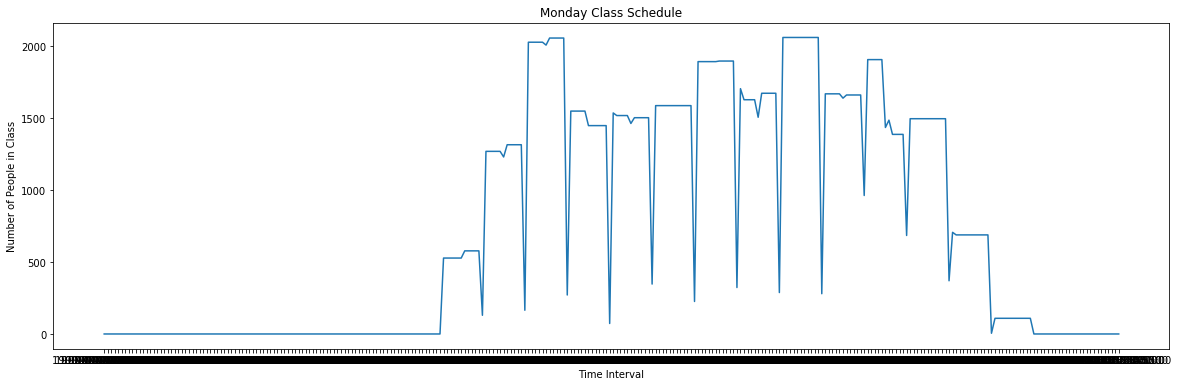

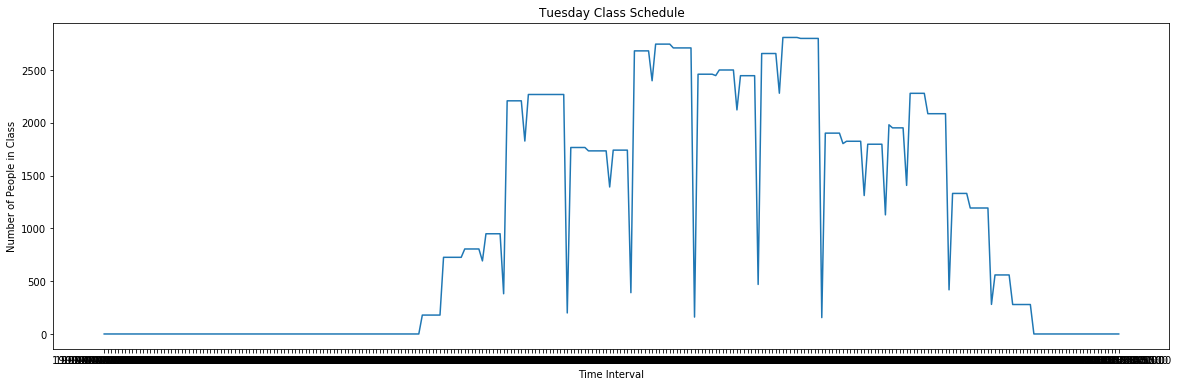

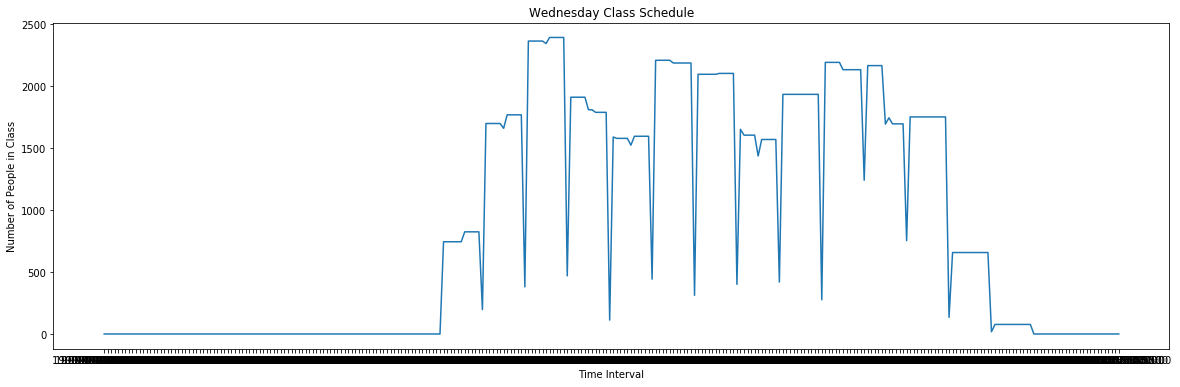

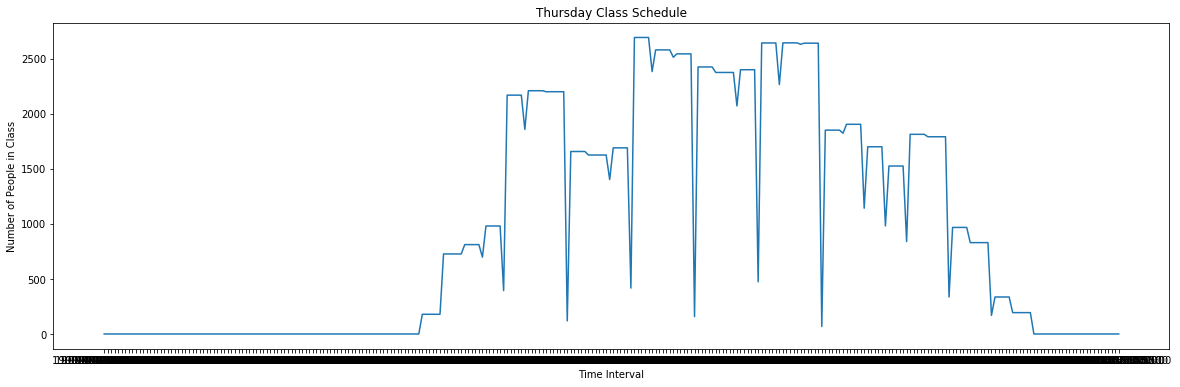

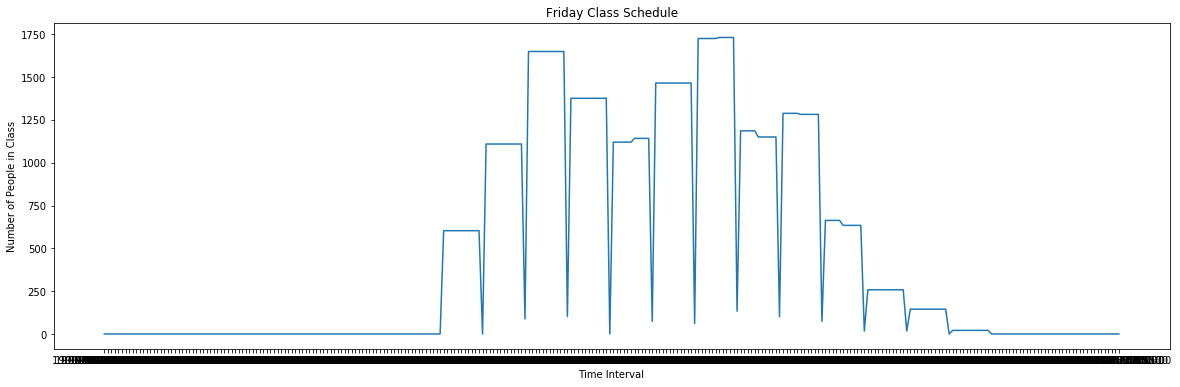

In [36]:
# Firstly, we load the processed csv files into data frames.
monday_class_schedule_df = pd.read_csv('data/monday_class_schedule.csv')
tuesday_class_schedule_df = pd.read_csv('data/tuesday_class_schedule.csv')
wednesday_class_schedule_df = pd.read_csv('data/wednesday_class_schedule.csv')
thursday_class_schedule_df = pd.read_csv('data/thursday_class_schedule.csv')
friday_class_schedule_df = pd.read_csv('data/friday_class_schedule.csv')

# Then we plot them for each day of the week
plt.plot(monday_class_schedule_df['Time_Stamp'], monday_class_schedule_df['Number_of_People'])
plt.ylabel('Number of People in Class')
plt.xlabel('Time Interval')
plt.title('Monday Class Schedule')
plt.show()

plt.plot(tuesday_class_schedule_df['Time_Stamp'], tuesday_class_schedule_df['Number_of_People'])
plt.ylabel('Number of People in Class')
plt.xlabel('Time Interval')
plt.title('Tuesday Class Schedule')
plt.show()

plt.plot(wednesday_class_schedule_df['Time_Stamp'], wednesday_class_schedule_df['Number_of_People'])
plt.ylabel('Number of People in Class')
plt.xlabel('Time Interval')
plt.title('Wednesday Class Schedule')
plt.show()

plt.plot(thursday_class_schedule_df['Time_Stamp'], thursday_class_schedule_df['Number_of_People'])
plt.ylabel('Number of People in Class')
plt.xlabel('Time Interval')
plt.title('Thursday Class Schedule')
plt.show()

plt.plot(friday_class_schedule_df['Time_Stamp'], friday_class_schedule_df['Number_of_People'])
plt.ylabel('Number of People in Class')
plt.xlabel('Time Interval')
plt.title('Friday Class Schedule')
plt.show()

After we visualize the schedule data, we will visualize the Geisel Library's foot traffic data in the same way, in which we will show average singal data for each day of the week. And finally we overlay all of the days, i.e., from Monday to Friday, into a single graph, so we can illustrate the difference between each day for the signal data. Notice that y-axis of these graphs represent the sum of present signal for all floors at Geisel Library. And the x-axis is same as the graphs for schedule data above, i.e., each tick represents start/end of a 5-minute period. One interesting observation we can see is that students are laziest on Friday and are most hardworking on Monday based on the graphs. And the graphs are shown below: 

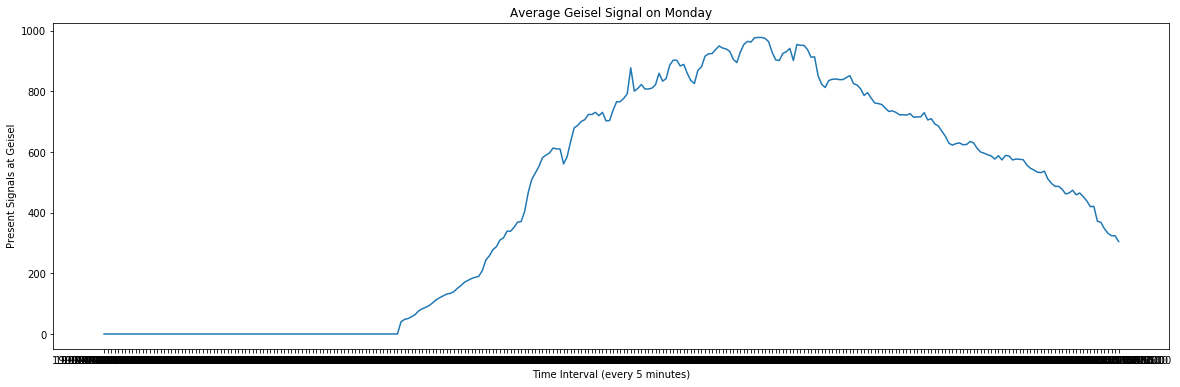

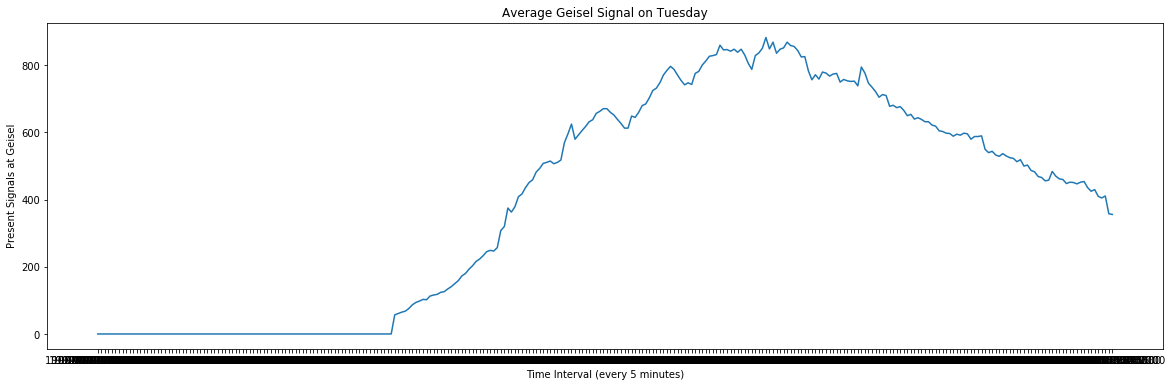

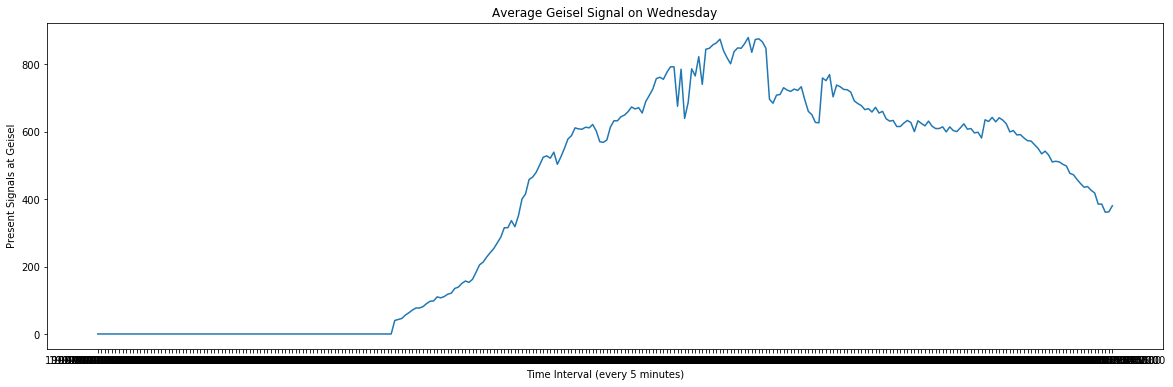

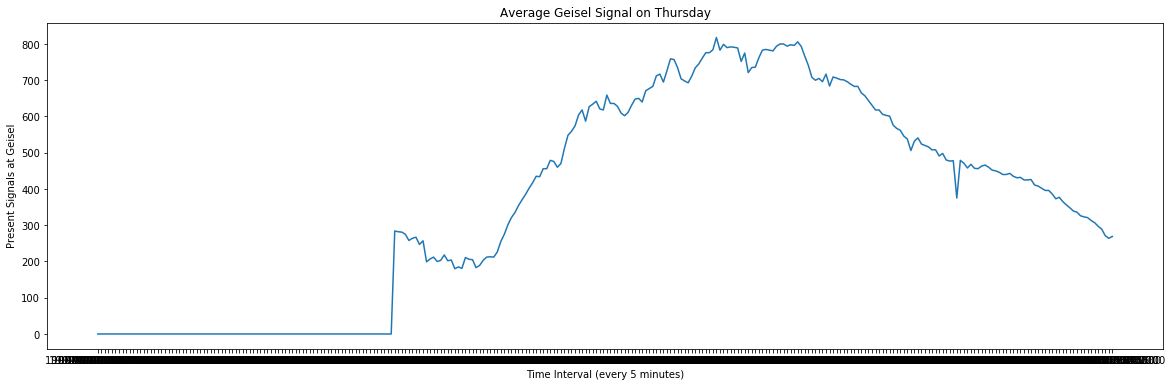

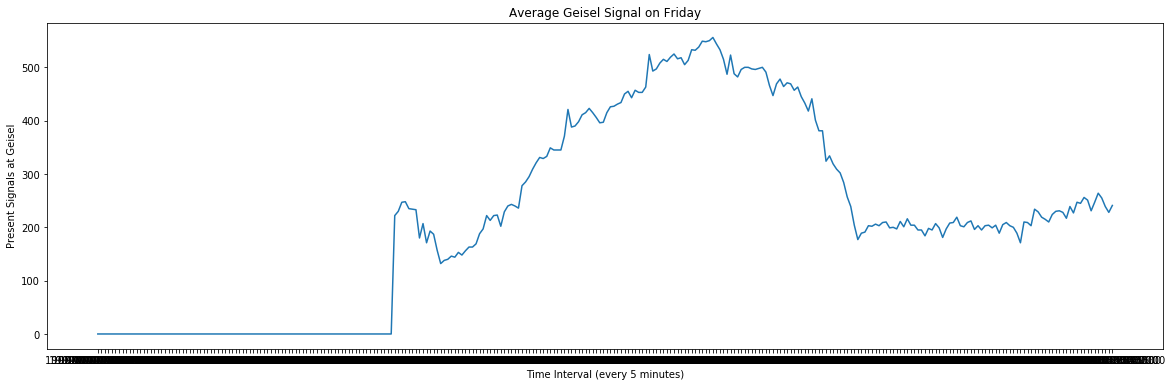

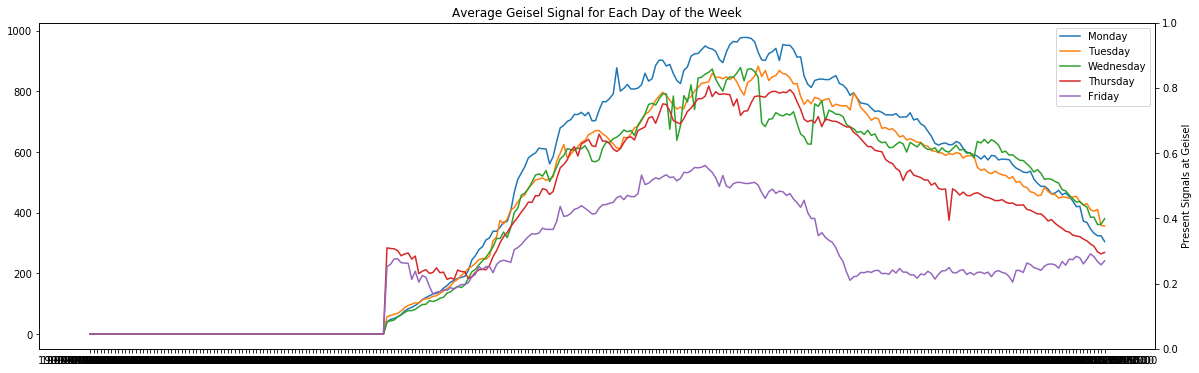

In [276]:
# Firstly, we load the processed csv files into dataframes 
monday_geisel_average_df = pd.read_csv('data/geisel_monday_average_2017.csv')
tuesday_geisel_average_df = pd.read_csv('data/geisel_tuesday_average_2017.csv')
wednesday_geisel_average_df = pd.read_csv('data/geisel_wednesday_average_2017.csv')
thursday_geisel_average_df = pd.read_csv('data/geisel_thursday_average_2017.csv')
friday_geisel_average_df = pd.read_csv('data/geisel_friday_average_2017.csv')

# Then we output graphs for geisel singal data for each day of the week 
plt.plot(monday_geisel_average_df['Time_Stamp'], monday_geisel_average_df['Present_Signals'])
plt.title('Average Geisel Signal on Monday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Present Signals at Geisel')
plt.show()
plt.plot(tuesday_geisel_average_df['Time_Stamp'], tuesday_geisel_average_df['Present_Signals'])
plt.title('Average Geisel Signal on Tuesday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Present Signals at Geisel')
plt.show()
plt.plot(wednesday_geisel_average_df['Time_Stamp'], wednesday_geisel_average_df['Present_Signals'])
plt.title('Average Geisel Signal on Wednesday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Present Signals at Geisel')
plt.show()
plt.plot(thursday_geisel_average_df['Time_Stamp'], thursday_geisel_average_df['Present_Signals'])
plt.title('Average Geisel Signal on Thursday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Present Signals at Geisel')
plt.show()
plt.plot(friday_geisel_average_df['Time_Stamp'], friday_geisel_average_df['Present_Signals'])
plt.title('Average Geisel Signal on Friday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Present Signals at Geisel')
plt.show()

# Finally, we overlay all of these graphs into one single graph to illustrate the differences
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(monday_geisel_average_df['Time_Stamp'], monday_geisel_average_df['Present_Signals'], label='Monday')
ax1.plot(tuesday_geisel_average_df['Time_Stamp'], tuesday_geisel_average_df['Present_Signals'], label='Tuesday')
ax1.plot(wednesday_geisel_average_df['Time_Stamp'], wednesday_geisel_average_df['Present_Signals'], label='Wednesday')
ax1.plot(thursday_geisel_average_df['Time_Stamp'], thursday_geisel_average_df['Present_Signals'], label='Thursday')
ax1.plot(friday_geisel_average_df['Time_Stamp'], friday_geisel_average_df['Present_Signals'], label='Friday')
ax1.legend()
plt.title('Average Geisel Signal for Each Day of the Week')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Present Signals at Geisel')
plt.show()

After we have shown the graphs for class schedule data and Geisel Library's signal data, we can now overlay schedule data with signal data to observe their relationship. The y-axis of these graphs represent present signal data at Geisel Library and number of people in class at the same time. And the ticks in the x-axis represent the start/end for each 5-minutes period. There are two main observations we can make from these graphs. The first observation is that as the number of people in classes increase throughout the day, signal data also increases, and vice versa. The second observation is that there are some sudden drops in the signal data during the grace periods between classes. One of the reasons that we have come up with for the sudden drops is that students would leave Geisel Library to go to classes during grace periods. The graphs are shown below: 

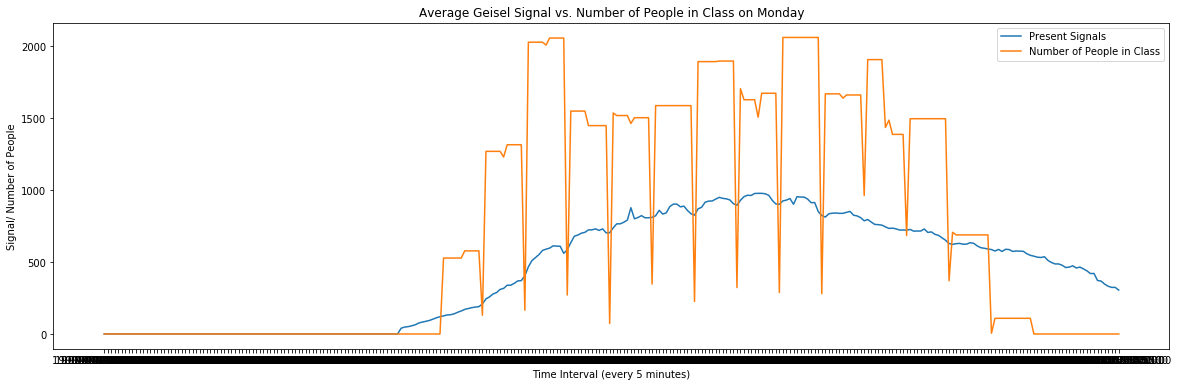

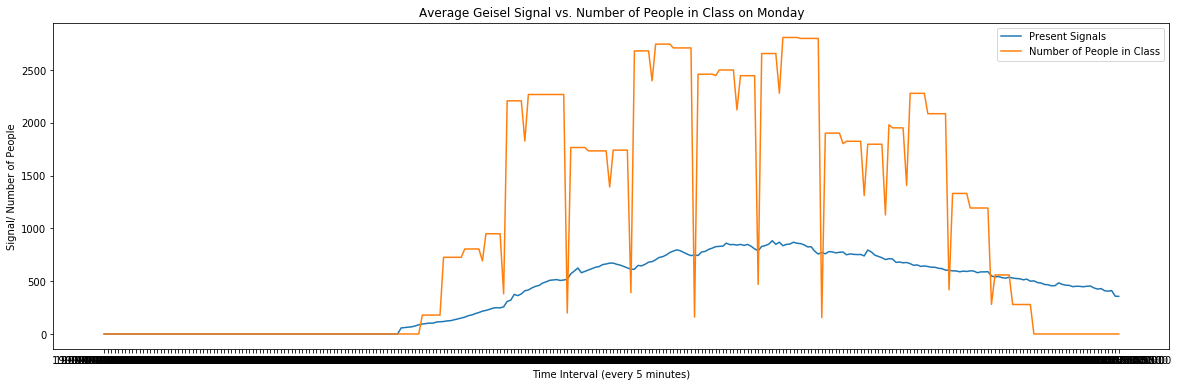

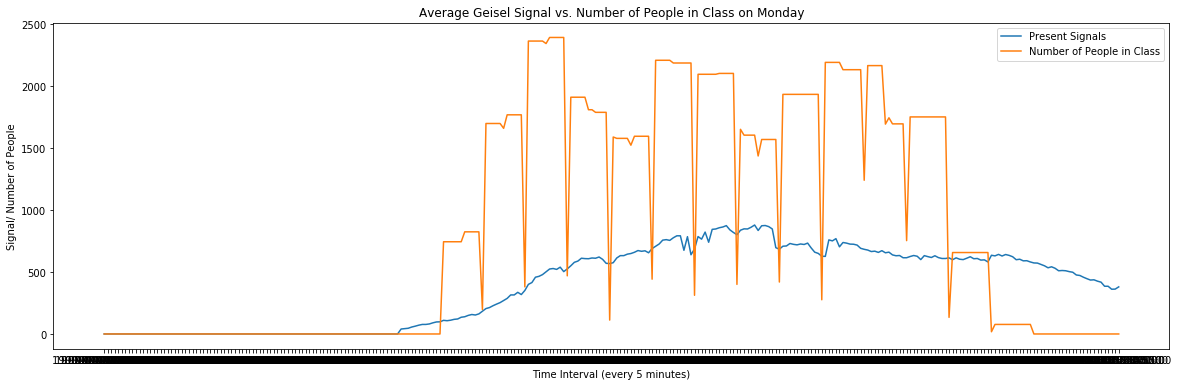

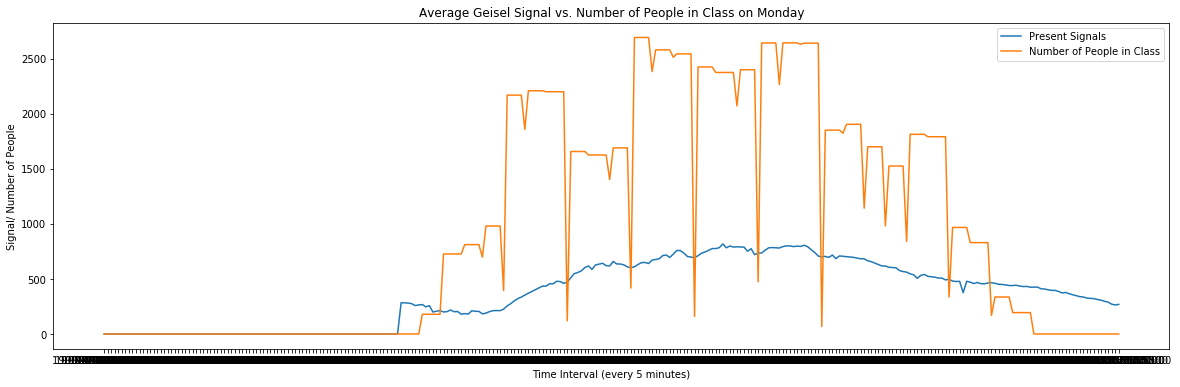

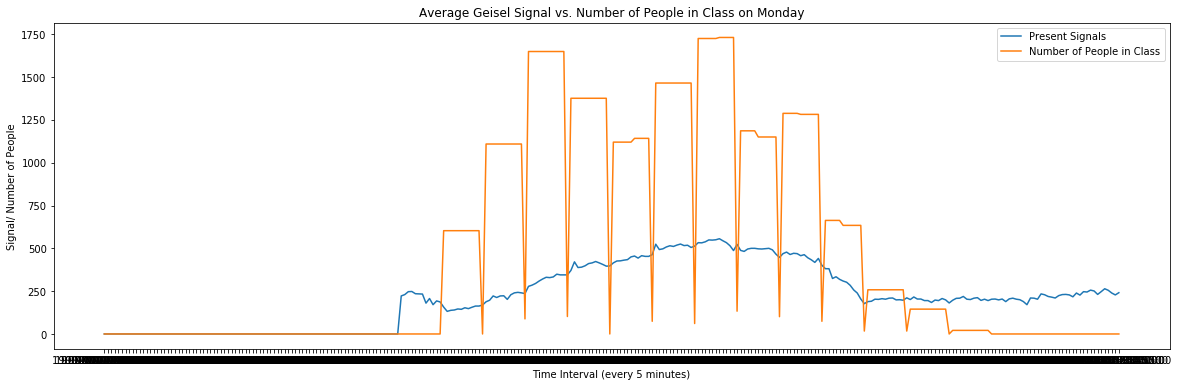

In [55]:
merged_df_m = pd.read_csv('merged_geisel_schedule_monday.csv')
merged_df_t = pd.read_csv('merged_geisel_schedule_tuesday.csv')
merged_df_w = pd.read_csv('merged_geisel_schedule_wednesday.csv')
merged_df_r = pd.read_csv('merged_geisel_schedule_thursday.csv')
merged_df_f = pd.read_csv('merged_geisel_schedule_friday.csv')

fig, ax1 = plt.subplots()
ax1.plot(merged_df_m['Time_Stamp'], merged_df_m['Present_Signals'], label='Present Signals')
ax1.plot(merged_df_m['Time_Stamp'], merged_df_m['Number_of_People'], label='Number of People in Class')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People in Class on Monday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(merged_df_t['Time_Stamp'], merged_df_t['Present_Signals'], label='Present Signals')
ax1.plot(merged_df_t['Time_Stamp'], merged_df_t['Number_of_People'], label='Number of People in Class')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People in Class on Monday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(merged_df_w['Time_Stamp'], merged_df_w['Present_Signals'], label='Present Signals')
ax1.plot(merged_df_w['Time_Stamp'], merged_df_w['Number_of_People'], label='Number of People in Class')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People in Class on Monday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(merged_df_r['Time_Stamp'], merged_df_r['Present_Signals'], label='Present Signals')
ax1.plot(merged_df_r['Time_Stamp'], merged_df_r['Number_of_People'], label='Number of People in Class')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People in Class on Monday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(merged_df_f['Time_Stamp'], merged_df_f['Present_Signals'], label='Present Signals')
ax1.plot(merged_df_f['Time_Stamp'], merged_df_f['Number_of_People'], label='Number of People in Class')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People in Class on Monday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show()

### Visualization for shuttle data

Now we plot the graphs for the shuttle data that we have processed and transformed in Data Processing section. Notice that we only have one week of data from 3 March, 2018 to 9 March, 2018, and we started scrapping in the afternoon on Monday, 3 March, 2018, so the half of the day for Monday graph is flat on the x-axis until the middle of the day. Otherwise, the graphs seem very reasonable, in which shuttle buses are most active at the start and end of the days, as you will see below. Also, notice that the ticks on the x-axis of of these graphs represent the start/end of each 5-minutes interval, and the y-axis represents the sum of number of people on all shuttle buses at UCSD. 

In [273]:
# First we load the processed data 
df_shuttle_m = pd.read_csv('data/monday_shuttle.csv')
df_shuttle_t = pd.read_csv('data/tuesday_shuttle.csv')
df_shuttle_w = pd.read_csv('data/wednesday_shuttle.csv')
df_shuttle_r = pd.read_csv('data/thursday_shuttle.csv')
df_shuttle_f = pd.read_csv('data/friday_shuttle.csv')

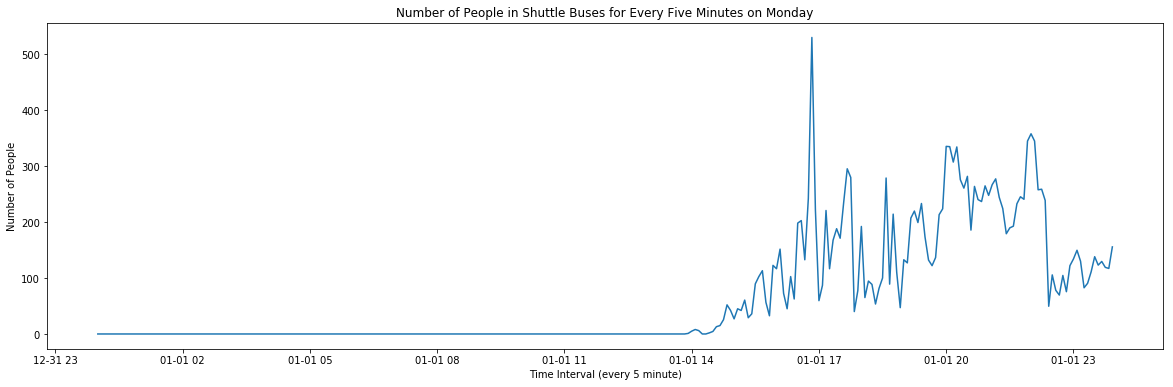

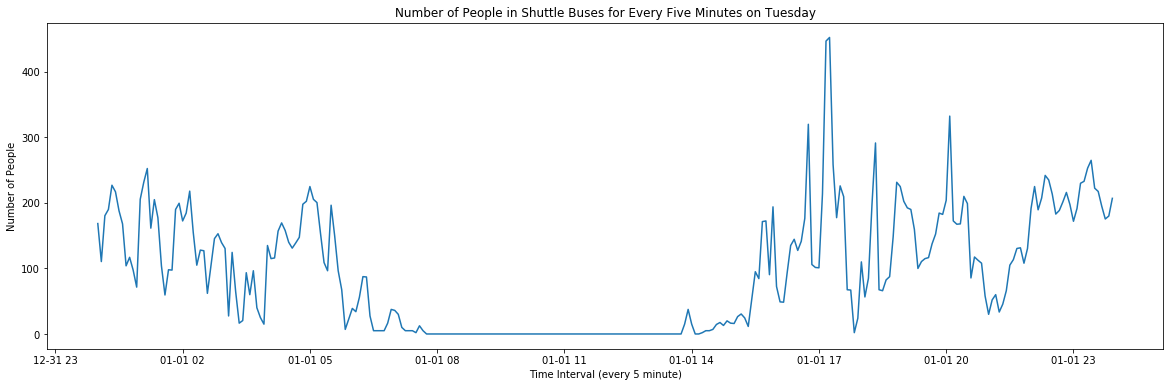

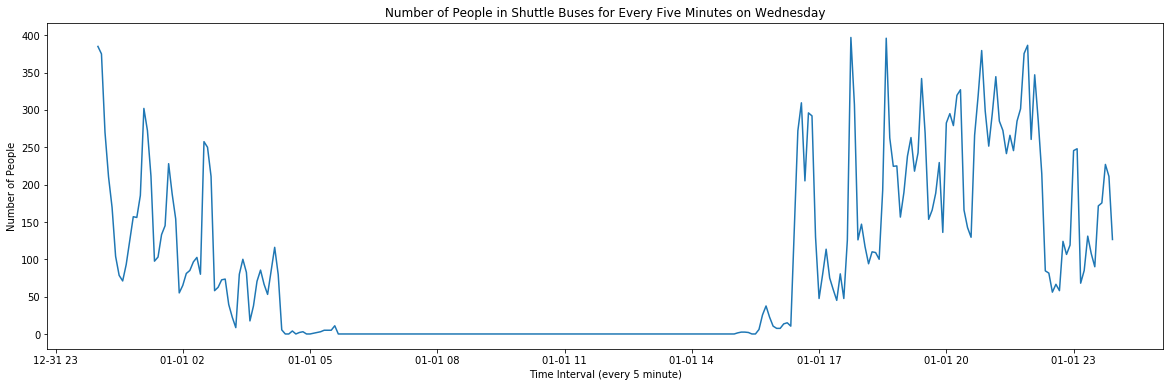

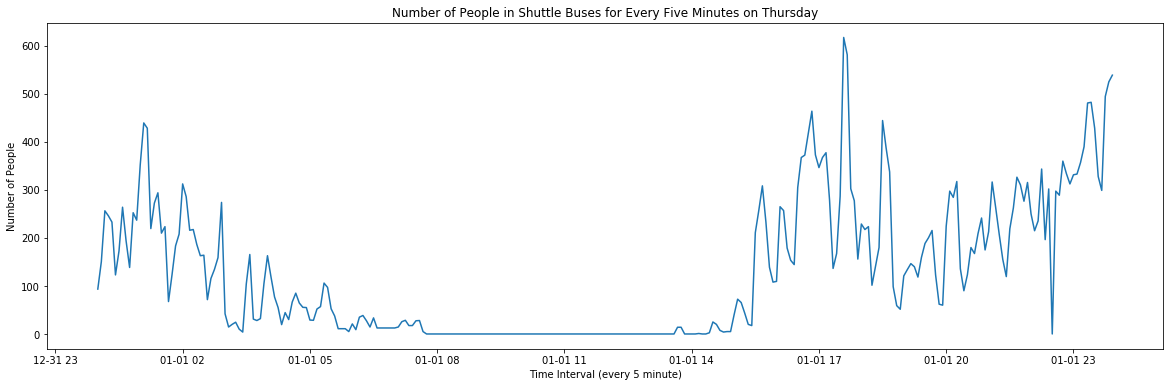

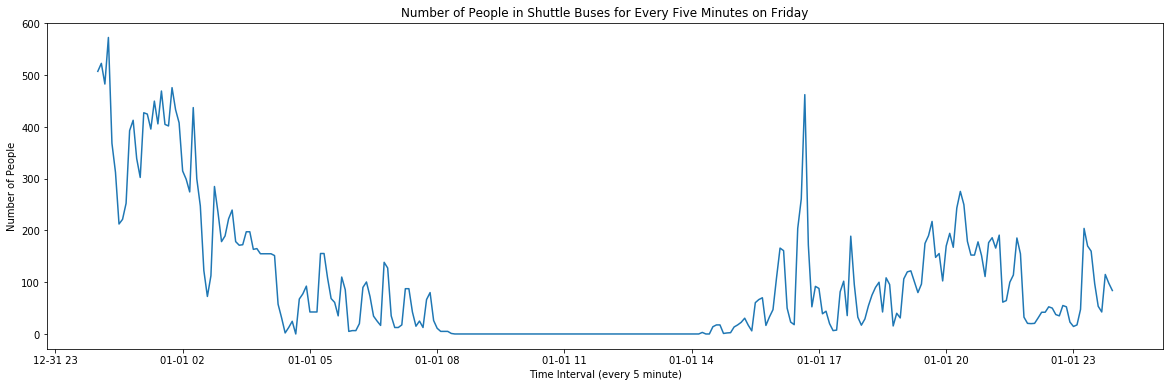

In [277]:
plt.plot(df_shuttle_m['Time_Stamp'], df_shuttle_m['Number_of_People'])
plt.title('Number of People in Shuttle Buses for Every Five Minutes on Monday')
plt.xlabel('Time Interval (every 5 minute)')
plt.ylabel('Number of People')
plt.show()

plt.plot(df_shuttle_t['Time_Stamp'], df_shuttle_t['Number_of_People'])
plt.title('Number of People in Shuttle Buses for Every Five Minutes on Tuesday')
plt.xlabel('Time Interval (every 5 minute)')
plt.ylabel('Number of People')
plt.show()

plt.plot(df_shuttle_w['Time_Stamp'], df_shuttle_w['Number_of_People'])
plt.title('Number of People in Shuttle Buses for Every Five Minutes on Wednesday')
plt.xlabel('Time Interval (every 5 minute)')
plt.ylabel('Number of People')
plt.show()

plt.plot(df_shuttle_r['Time_Stamp'], df_shuttle_r['Number_of_People'])
plt.title('Number of People in Shuttle Buses for Every Five Minutes on Thursday')
plt.xlabel('Time Interval (every 5 minute)')
plt.ylabel('Number of People')
plt.show()

plt.plot(df_shuttle_f['Time_Stamp'], df_shuttle_f['Number_of_People'])
plt.title('Number of People in Shuttle Buses for Every Five Minutes on Friday')
plt.xlabel('Time Interval (every 5 minute)')
plt.ylabel('Number of People')
plt.show()

After we have shown the graphs for the shuttle data for each day of the week, we will overlay the shuttle data with the schedule data to see how they relate to each other. Although the shuttle data only comes from a week in 2018 Spring quarter, while the Geisel signal data comes from the average of the 2017 Fall quarter, we will assume that shuttle data will be roughly similar for every day in general circumstane, i.e., students roughly come to school or leave school at the same time. By overlaying shuttle data with geisel data, we will roughly observe that, shuttles buses become very active in the morning when students come people to school, and when they become inactive again, number of people at Geisel will start to increase. On the other hand, when shuttls buses become active again when people start to leave school we suppose, number of people at Geisel Library will start to decrease. This visualization gives us an idea that there is an interesting relationship between shuttle data and Geisel data. Notice that the y-axis of these graphs represent signal data/ sum of the number of people on shuttle buses, while ticks on x-axis represent 

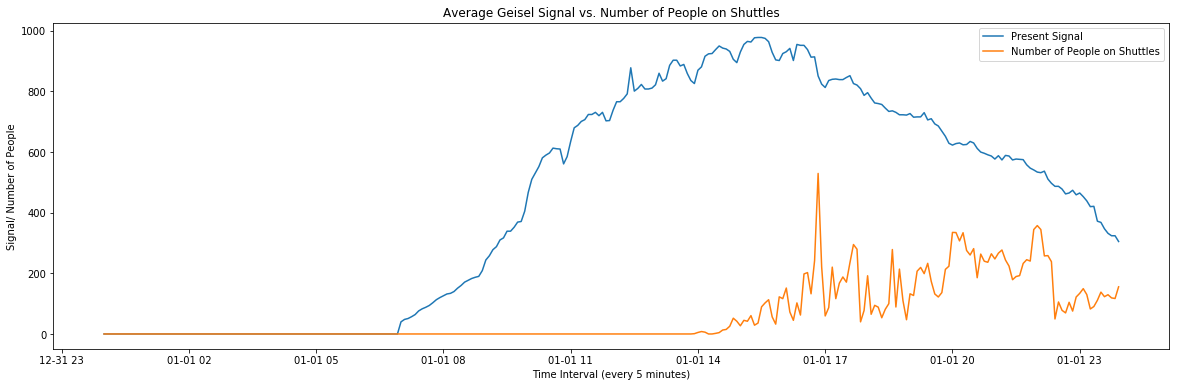

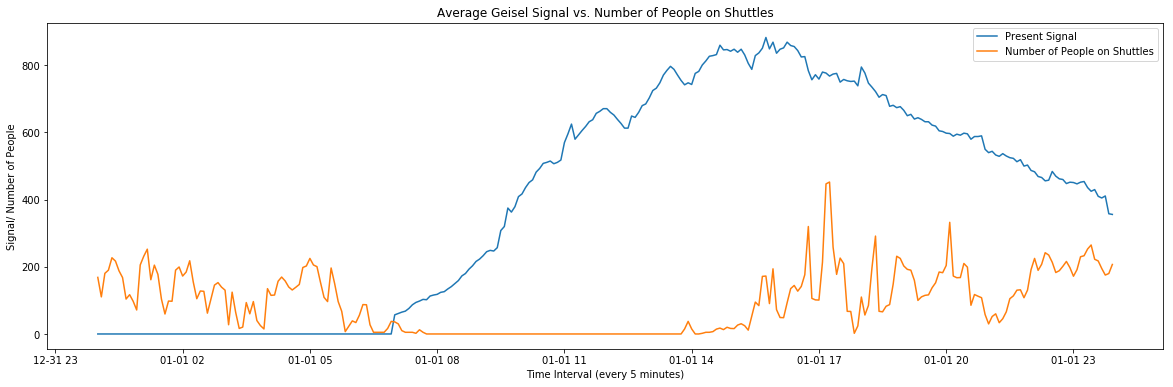

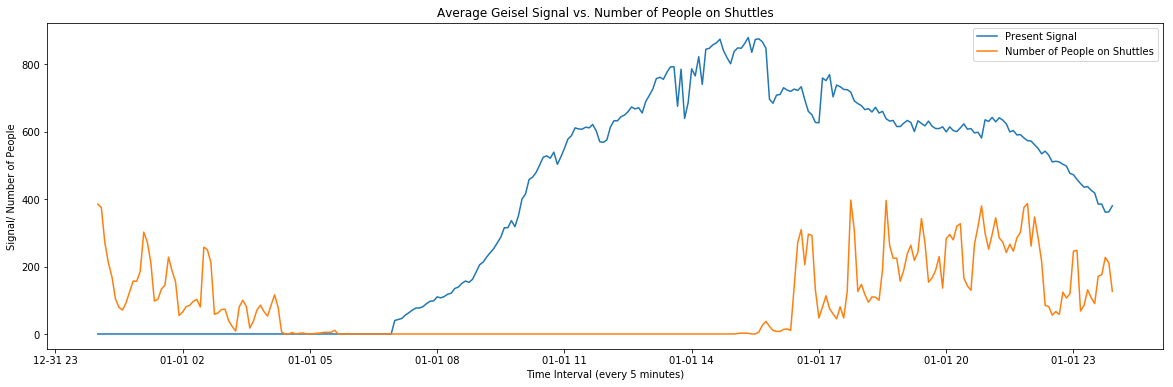

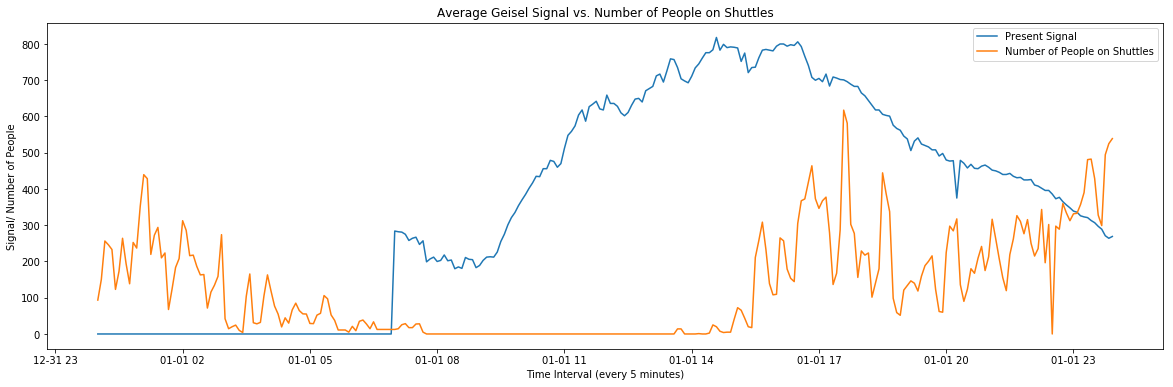

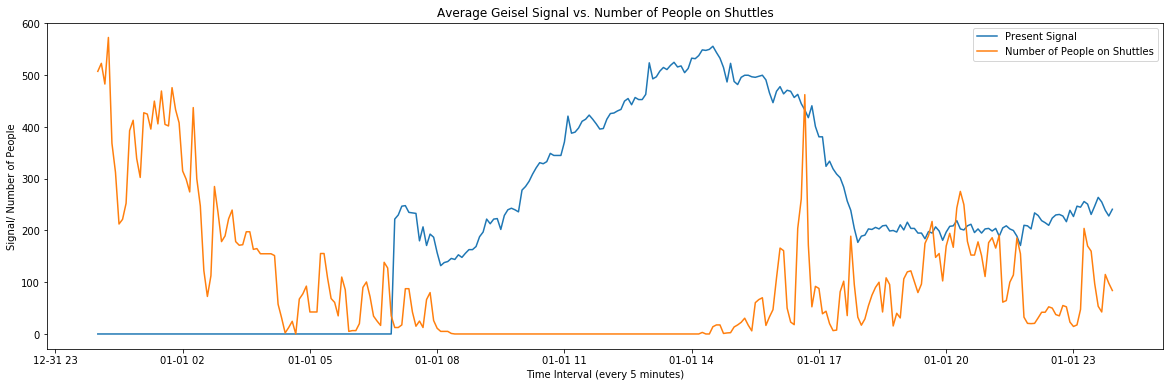

In [278]:
# Load Geisel data to overlay 
df_geisel_m = pd.read_csv('data/geisel_monday_average_2017.csv')
df_geisel_t = pd.read_csv('data/geisel_tuesday_average_2017.csv')
df_geisel_w = pd.read_csv('data/geisel_wednesday_average_2017.csv')
df_geisel_r = pd.read_csv('data/geisel_thursday_average_2017.csv')
df_geisel_f = pd.read_csv('data/geisel_friday_average_2017.csv')

df_geisel_m['Time_Stamp'] = df_geisel_m['Time_Stamp'].apply(transform_datetime)
df_geisel_t['Time_Stamp'] = df_geisel_m['Time_Stamp'].apply(transform_datetime)
df_geisel_w['Time_Stamp'] = df_geisel_m['Time_Stamp'].apply(transform_datetime)
df_geisel_r['Time_Stamp'] = df_geisel_m['Time_Stamp'].apply(transform_datetime)
df_geisel_f['Time_Stamp'] = df_geisel_m['Time_Stamp'].apply(transform_datetime)

merged_df_m = pd.merge(df_geisel_m, df_shuttle_m, on='Time_Stamp')
merged_df_t = pd.merge(df_geisel_t, df_shuttle_t, on='Time_Stamp')
merged_df_w = pd.merge(df_geisel_w, df_shuttle_w, on='Time_Stamp')
merged_df_r = pd.merge(df_geisel_r, df_shuttle_r, on='Time_Stamp')
merged_df_f = pd.merge(df_geisel_f, df_shuttle_f, on='Time_Stamp')

fig, ax1 = plt.subplots() 
ax1.plot(merged_df_m['Time_Stamp'], merged_df_m['Present_Signals'], label='Present Signal')
ax1.plot(merged_df_m['Time_Stamp'], merged_df_m['Number_of_People'], label='Number of People on Shuttles')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People on Shuttles')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show() 

fig, ax1 = plt.subplots() 
ax1.plot(merged_df_t['Time_Stamp'], merged_df_t['Present_Signals'], label='Present Signal')
ax1.plot(merged_df_t['Time_Stamp'], merged_df_t['Number_of_People'], label='Number of People on Shuttles')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People on Shuttles')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show() 

fig, ax1 = plt.subplots() 
ax1.plot(merged_df_w['Time_Stamp'], merged_df_w['Present_Signals'], label='Present Signal')
ax1.plot(merged_df_w['Time_Stamp'], merged_df_w['Number_of_People'], label='Number of People on Shuttles')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People on Shuttles')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show() 

fig, ax1 = plt.subplots() 
ax1.plot(merged_df_r['Time_Stamp'], merged_df_r['Present_Signals'], label='Present Signal')
ax1.plot(merged_df_r['Time_Stamp'], merged_df_r['Number_of_People'], label='Number of People on Shuttles')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People on Shuttles')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show() 

fig, ax1 = plt.subplots() 
ax1.plot(merged_df_f['Time_Stamp'], merged_df_f['Present_Signals'], label='Present Signal')
ax1.plot(merged_df_f['Time_Stamp'], merged_df_f['Number_of_People'], label='Number of People on Shuttles')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People on Shuttles')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show() 

Then, let's plot out geisel throughout both fall and winter quarter.

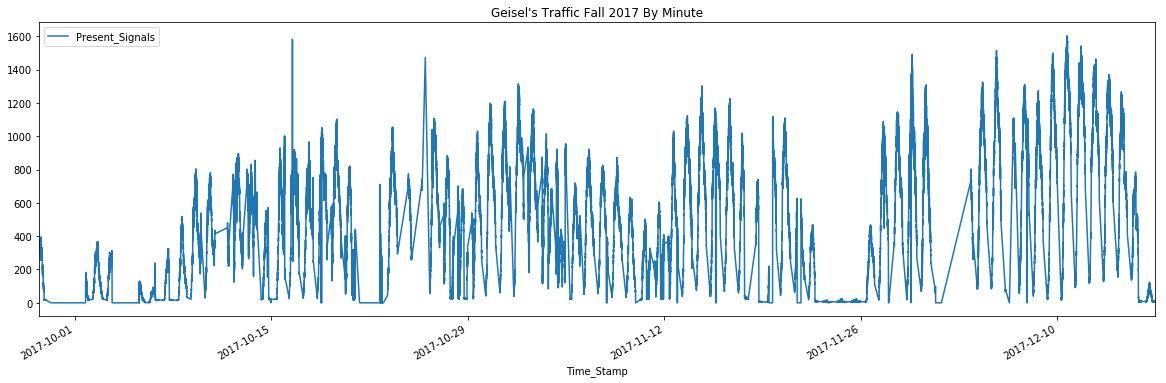

In [14]:
# TODO(phil): fix the outlier in data cleaning section
ax = df_geisel_fall.plot()
_ = ax.set_title("Geisel's Traffic Fall 2017 By Minute")

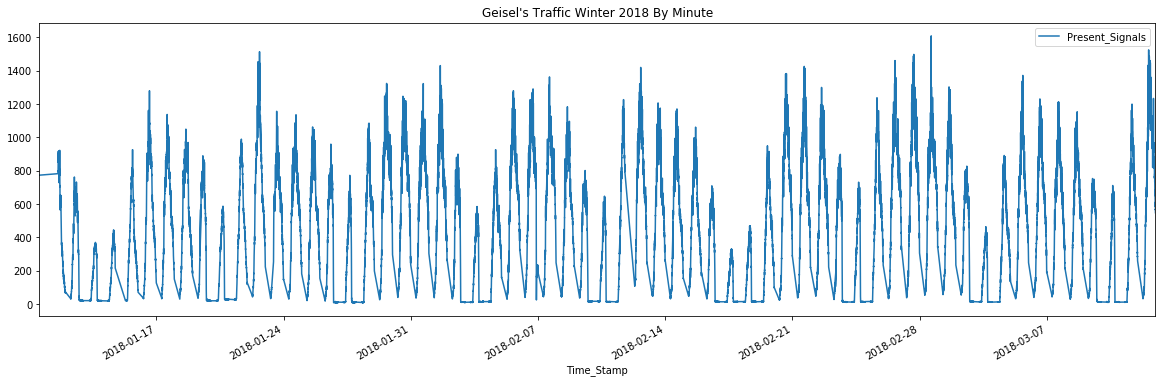

In [15]:
ax = df_geisel_winter.plot()
_ = ax.set_title("Geisel's Traffic Winter 2018 By Minute")

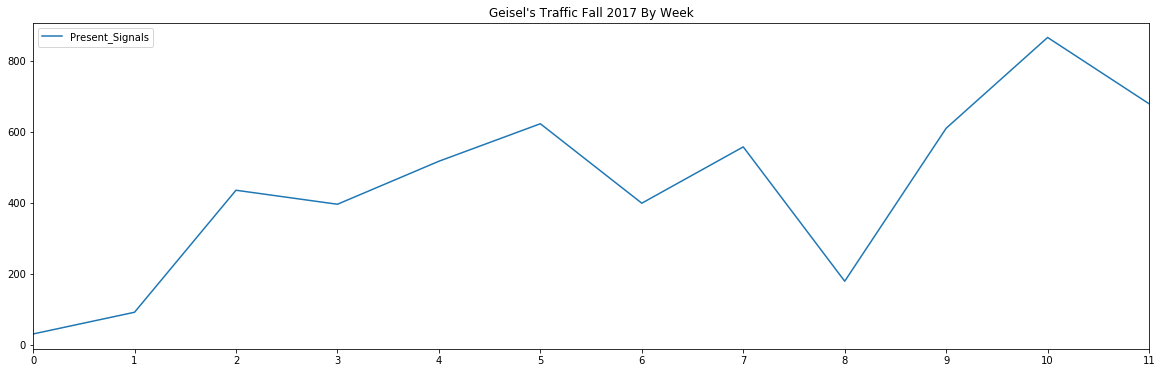

In [17]:
df_week_fall = df_geisel_fall.resample('W').mean()
df_week_fall.index = [week for week in range(len(df_week_fall))]
ax = df_week_fall.plot()
plt.xticks(df_week_fall.index)
_ = ax.set_title("Geisel's Traffic Fall 2017 By Week")

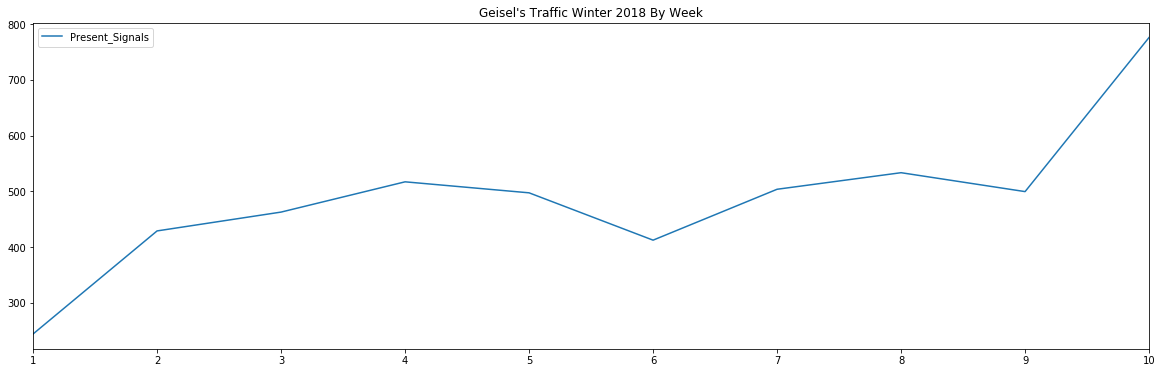

In [19]:
df_week_winter = df_geisel_winter.resample('W').mean()
df_week_winter.index = [week for week in range(1, len(df_week_winter)+1)]
ax = df_week_winter.plot()
plt.xticks(df_week_winter.index)
_ = ax.set_title("Geisel's Traffic Winter 2018 By Week")

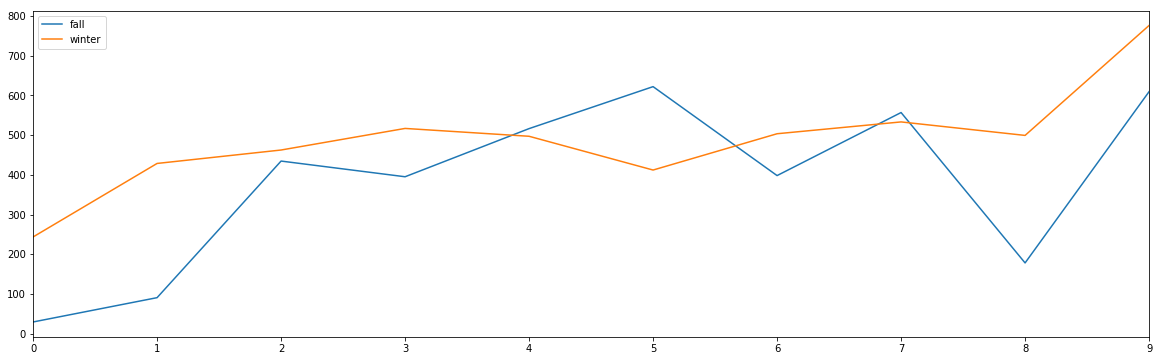

In [20]:
X = [week for week in range(len(df_week_winter))]
fall_weeks = list(df_week_fall['Present_Signals'][:len(df_week_winter.values)])
winter_weeks = list(df_week_winter['Present_Signals'])
week_cmp_df = pd.DataFrame({'fall': fall_weeks, 'winter': winter_weeks}, index=X)
plt.figure(); week_cmp_df.plot();

We visualize the frequency of signals throughout Geisel over time. There should be a signficant amount of low signals because during the night and most of the morning geisel has relatively few people.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ea4c98828>]], dtype=object)

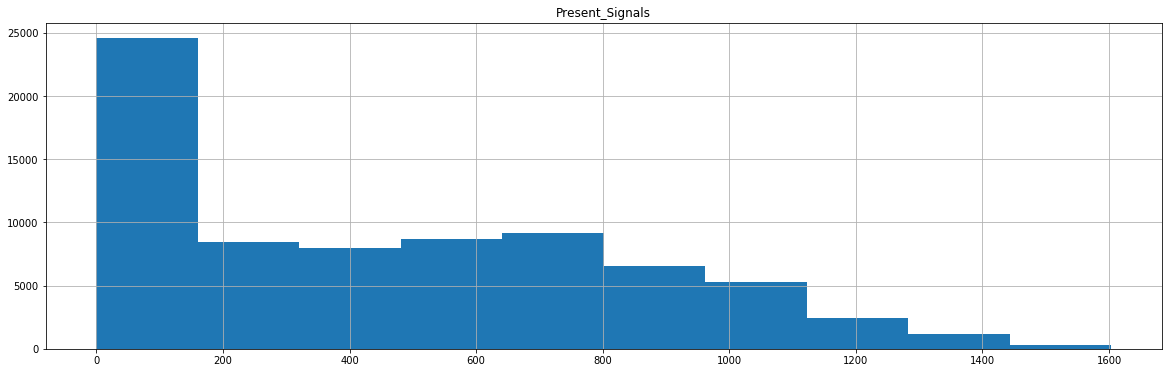

In [154]:
df_geisel_fall.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e9bcc0828>]], dtype=object)

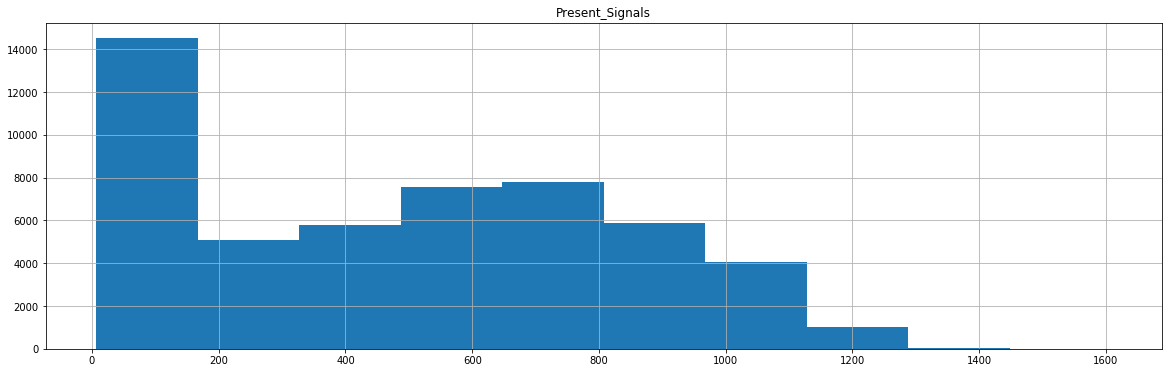

In [155]:
df_geisel_winter.hist()

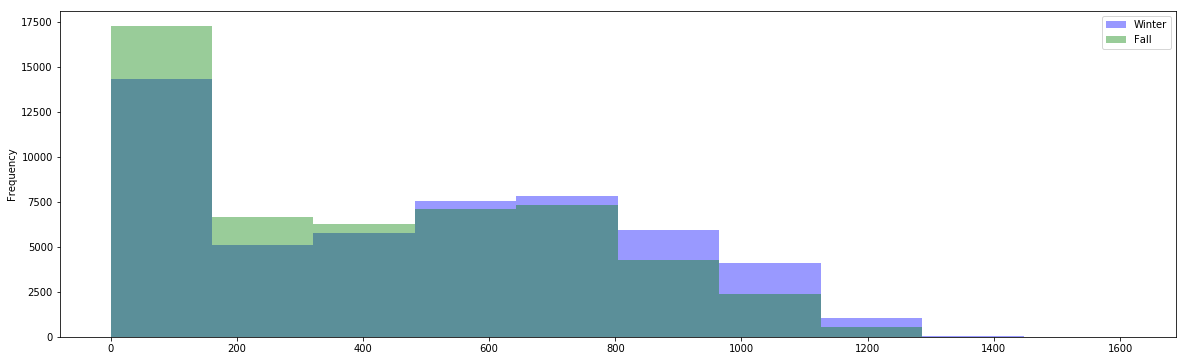

In [161]:
df_days = pd.DataFrame(list(df_geisel_winter['Present_Signals']), columns=['Winter'])
df_days['Fall'] = list(df_geisel_fall['Present_Signals'])[:len(df_days)]
plt.figure();
df_days.plot.hist(color=['blue', 'green'], alpha=0.4)

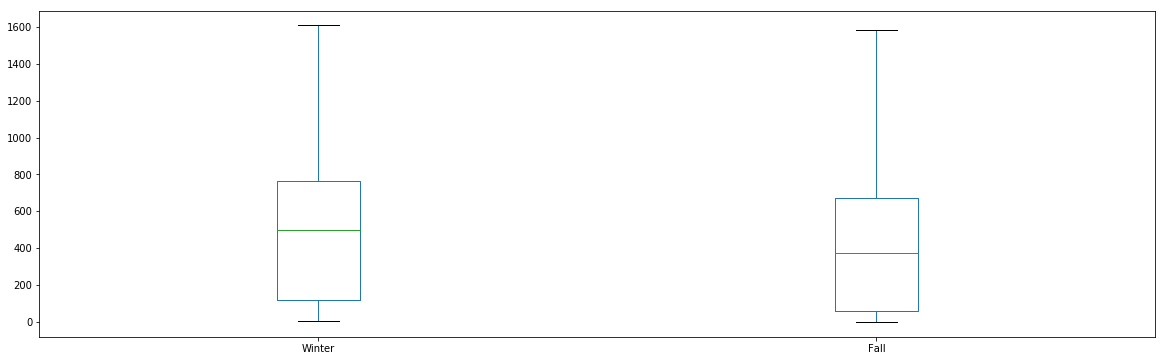

In [163]:
df_days.plot.box()

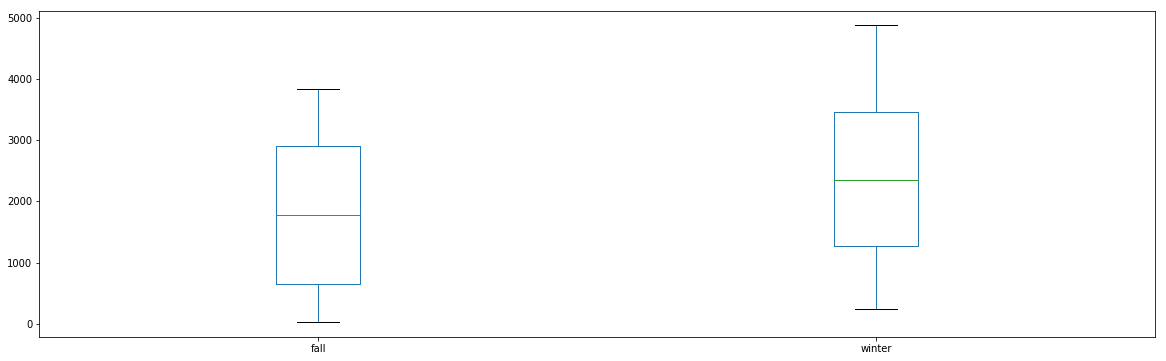

In [166]:
week_cmp_df.plot.box()

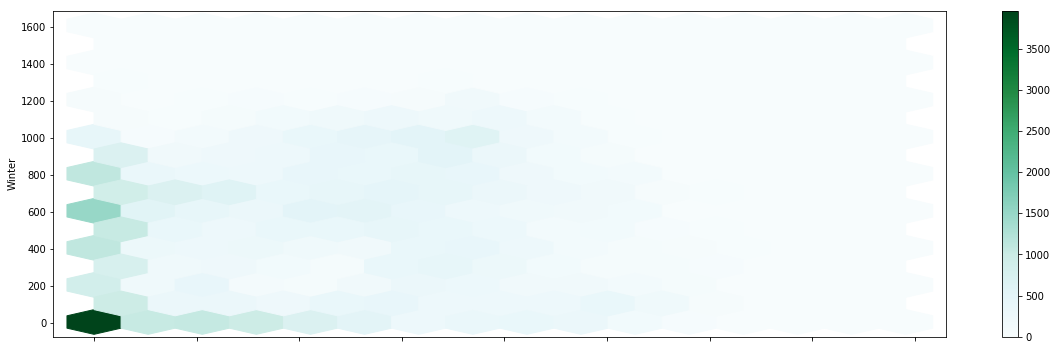

In [174]:
df_days.plot.hexbin(x='Fall', y='Winter', gridsize=15)

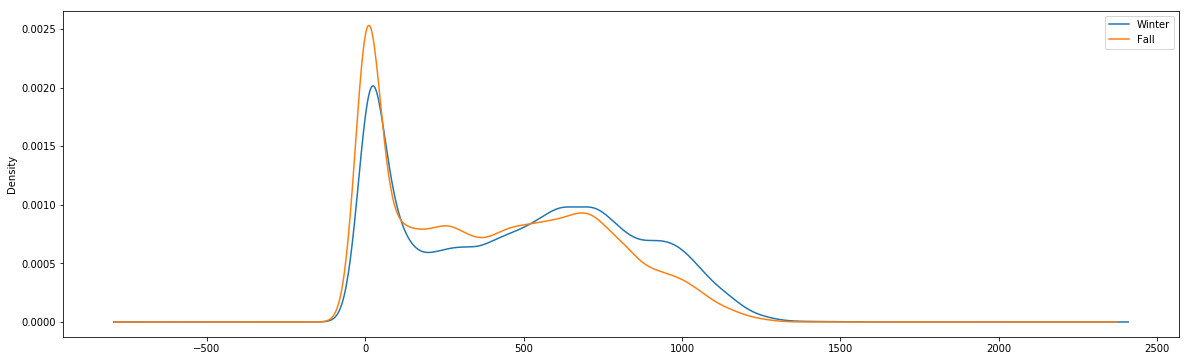

In [184]:
df_days.plot.kde()

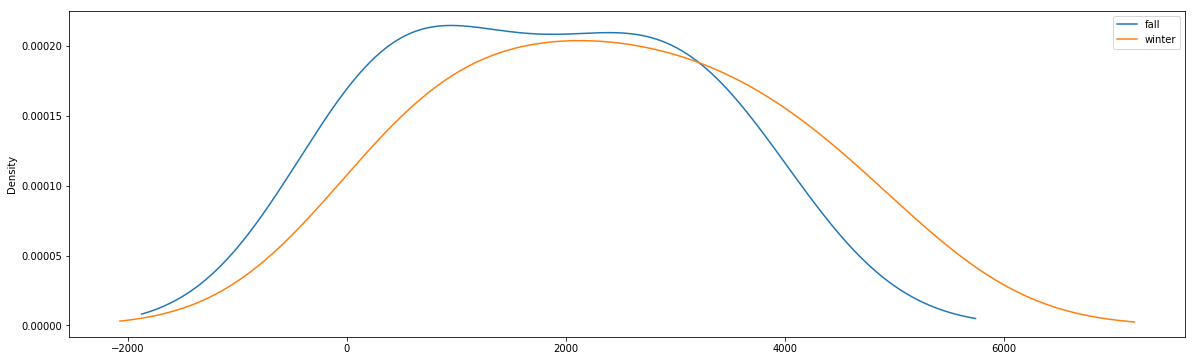

In [185]:
week_cmp_df.plot.kde()

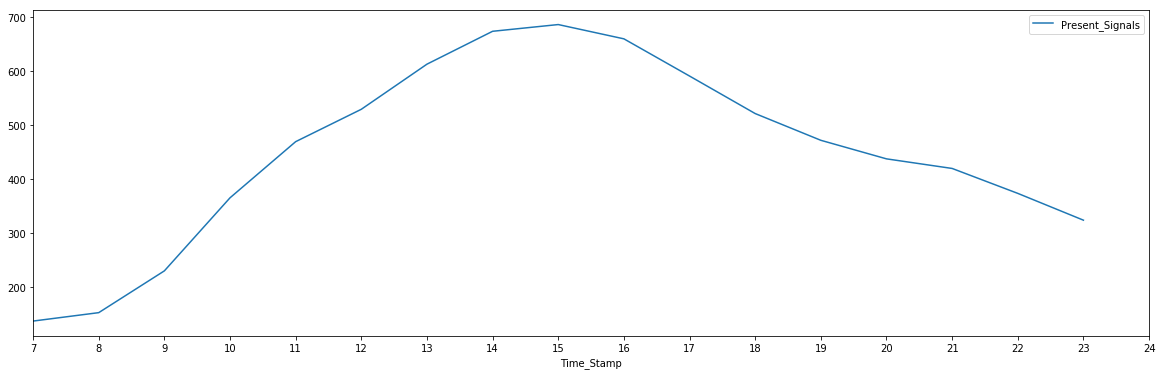

In [21]:
df_geisel_fall.groupby(df_geisel_fall.index.hour).mean().plot()
_ = plt.xticks([hour for hour in range(7, 25)])

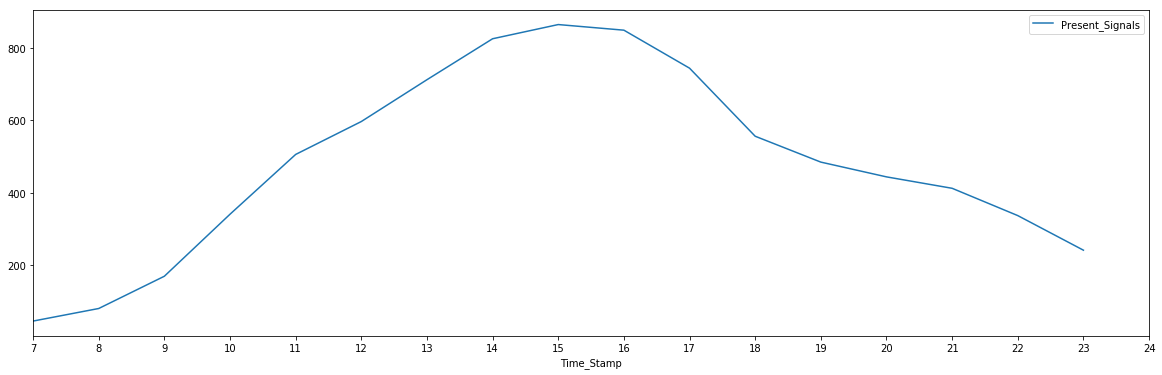

In [22]:
df_geisel_winter.groupby(df_geisel_winter.index.hour).mean().plot()
_ = plt.xticks([hour for hour in range(7, 25)])

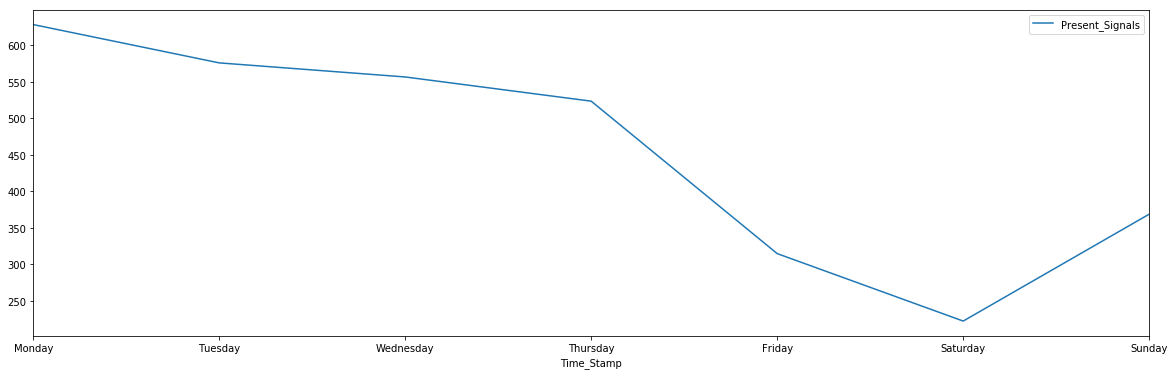

In [23]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = df_geisel_fall.groupby(df_geisel_fall.index.weekday).mean().plot()
_ = ax.set_xticklabels(days_of_week)

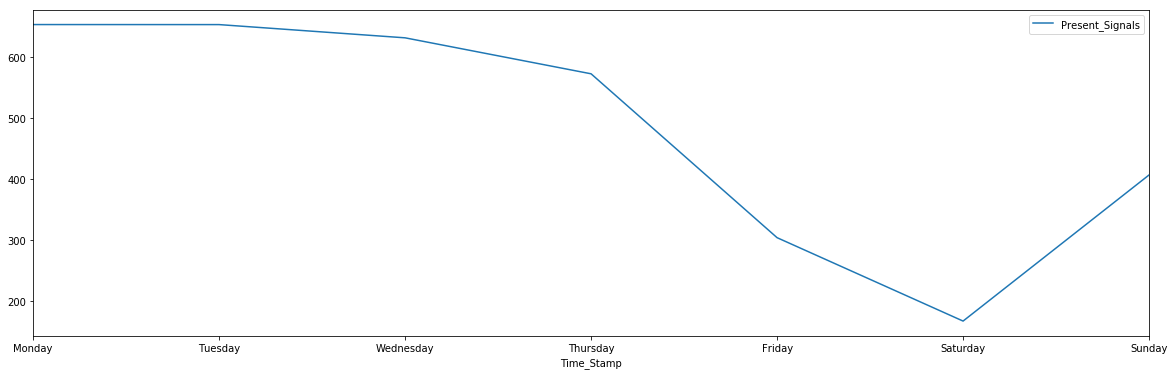

In [24]:
ax = df_geisel_winter.groupby(df_geisel_winter.index.weekday).mean().plot()
_ = ax.set_xticklabels(days_of_week)

### Weather

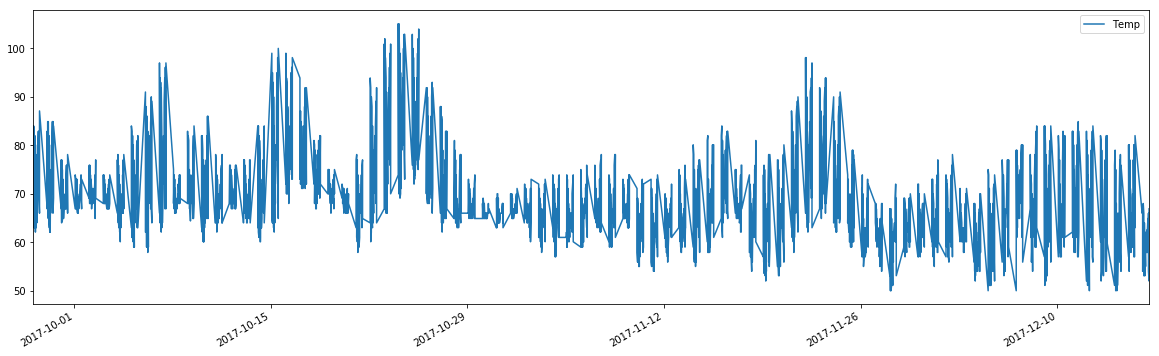

In [25]:
df_weather.plot()

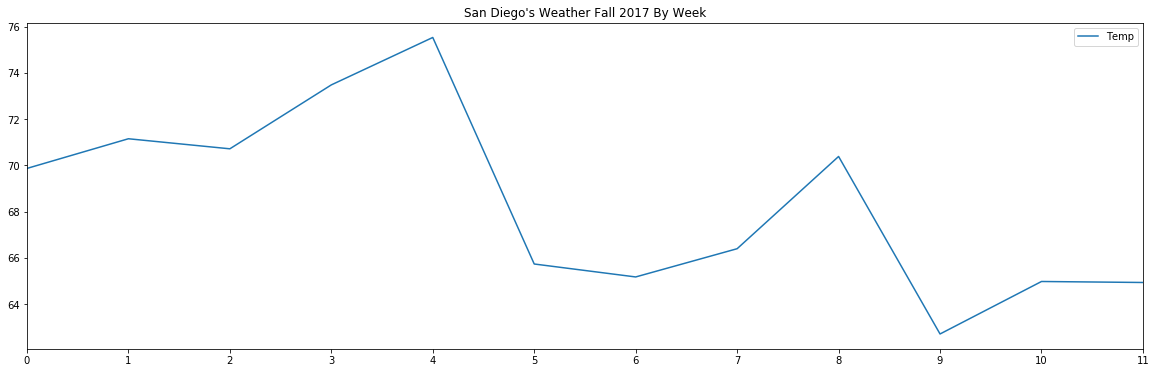

In [26]:
df_weather_week = df_weather.resample('W').mean()
df_weather_week.index = [week for week in range(len(df_weather_week))]
ax = df_weather_week.plot()
plt.xticks(df_weather_week.index)
_ = ax.set_title("San Diego's Weather Fall 2017 By Week")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba7a47db38>]], dtype=object)

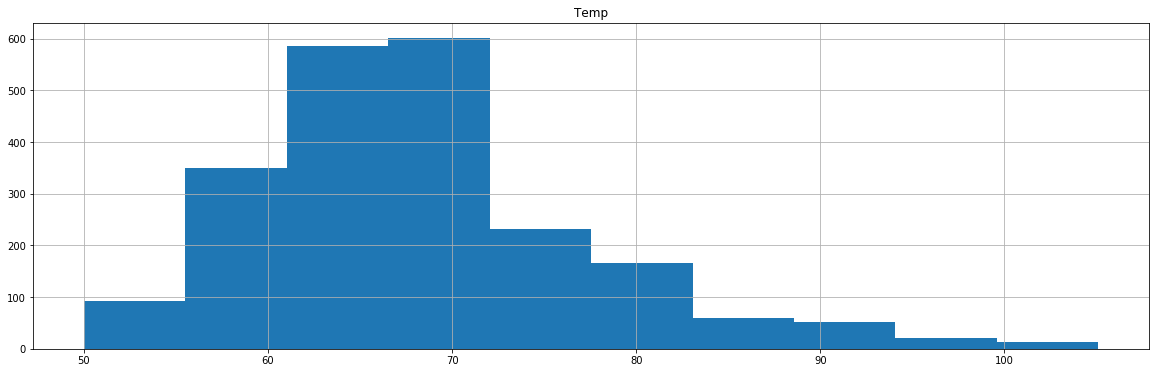

In [27]:
df_weather.hist()

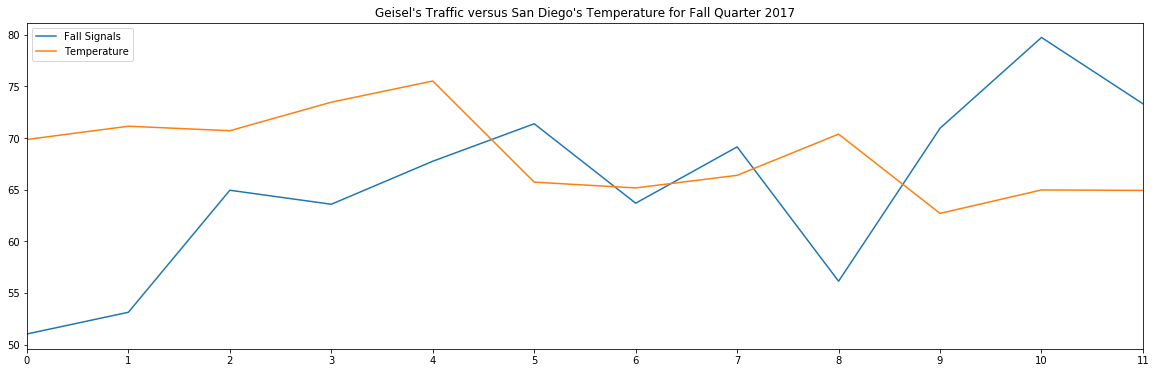

In [28]:
def translate(value, leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)

X = [week for week in range(len(df_weather_week))]
min_signals, max_signals = df_geisel_fall['Present_Signals'].min(), df_geisel_fall['Present_Signals'].max()
min_temp, max_temp = df_weather['Temp'].min(), df_weather['Temp'].max()
fall_weeks = list(df_week_fall['Present_Signals'].apply(lambda x: translate(x, min_signals, max_signals, min_temp, max_temp)))
weather_weeks = list(df_weather_week['Temp'])
week_cmp_df = pd.DataFrame({'Fall Signals': fall_weeks, 'Temperature': weather_weeks}, index=X)
plt.figure(); ax = week_cmp_df.plot();
plt.xticks([week for week in range(12)]); ax.set_title("Geisel's Traffic versus San Diego's Temperature for Fall Quarter 2017");

### Shuttle

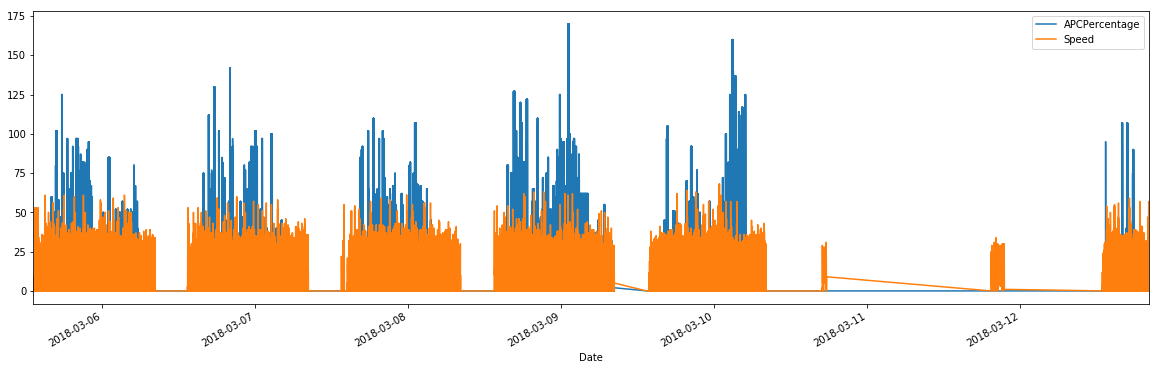

In [29]:
df_shuttle.plot()

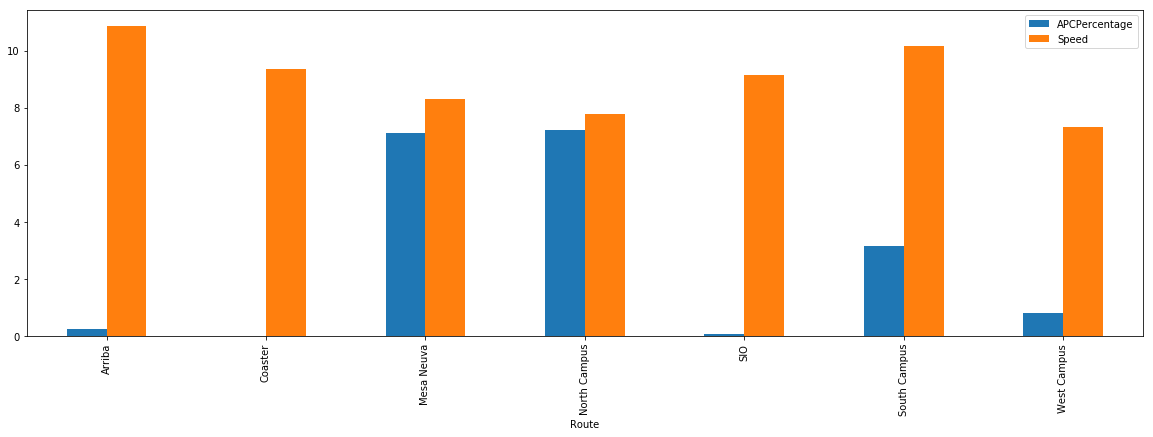

In [30]:
df_shuttle.groupby('Route').mean().plot(kind='bar')

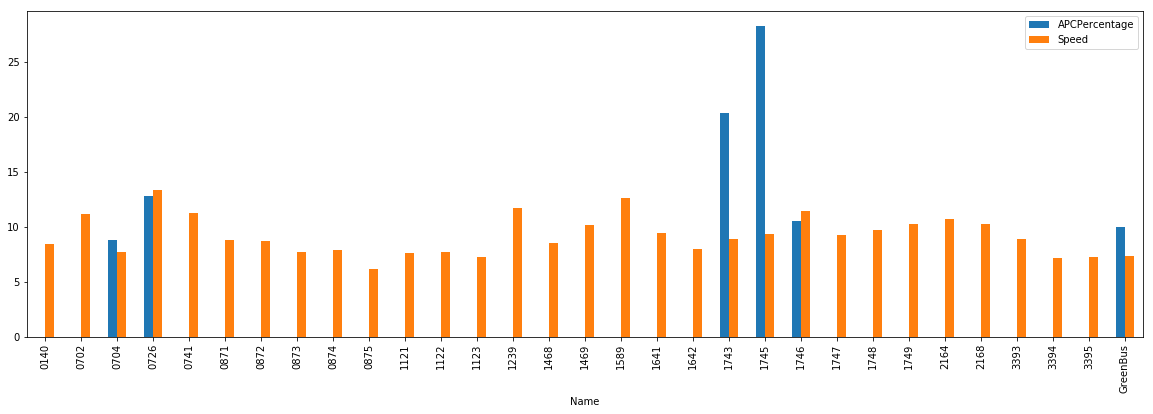

In [31]:
df_shuttle.groupby('Name').mean().plot(kind='bar')

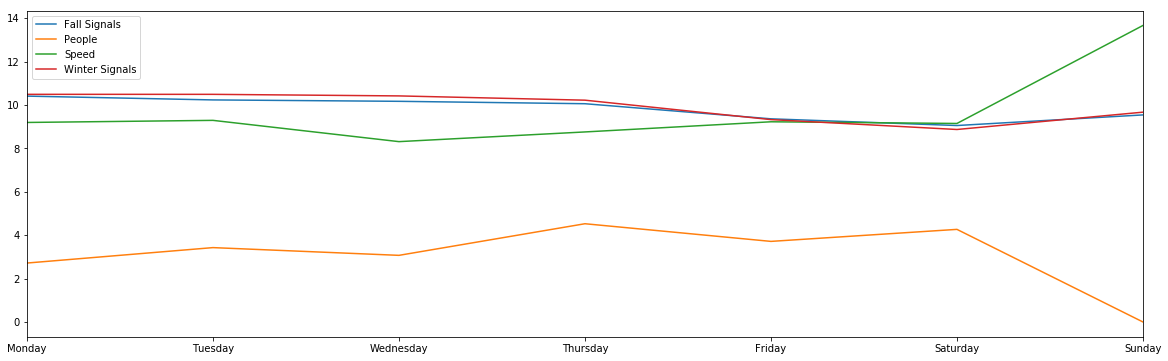

In [32]:
shuttle_weekday = df_shuttle.groupby(df_shuttle.index.weekday).mean()
fall_weekday = df_geisel_fall.groupby(df_geisel_fall.index.weekday).mean()
winter_weekday = df_geisel_winter.groupby(df_geisel_winter.index.weekday).mean()

min_signals, max_signals = df_geisel_fall['Present_Signals'].min(), df_geisel_fall['Present_Signals'].max()
min_speed, max_speed = shuttle_weekday['Speed'].min(), shuttle_weekday['Speed'].max()

weekday_cmp_df = pd.DataFrame({
    'Fall Signals': fall_weekday['Present_Signals'].apply(lambda x: translate(x, min_signals, max_signals, min_speed, max_speed)),
    'Winter Signals': winter_weekday['Present_Signals'].apply(lambda x: translate(x, min_signals, max_signals, min_speed, max_speed)),
    'Speed': shuttle_weekday['Speed'],
    'People': shuttle_weekday['APCPercentage']
})
plt.figure(); ax = weekday_cmp_df.plot(); ax.set_xticklabels(days_of_week);

## Data Analysis and Results 

Firstly, we will start by discussing Geisel Library's foot traffic signal data vs. class schedule data. From the graphs for schedule data and singnal data for each day of the week above, 

## Privacy/Ethics Considerations 

## Conclusions and Discussion